In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [2]:
pwd

'D:\\258 Sem Proj'

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
print( type(X_train), X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


In [6]:
print( type(y_train), y_train.shape)

<class 'numpy.ndarray'> (60000,)


In [7]:
print( type(X_test), X_test.shape)

<class 'numpy.ndarray'> (10000, 28, 28)


In [8]:
print( type(y_test), y_test.shape)

<class 'numpy.ndarray'> (10000,)


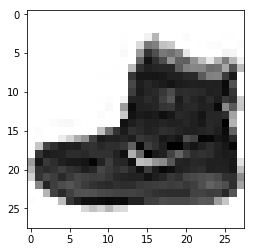

In [9]:
%matplotlib inline
plt.imshow(X_train[0], cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.show()

In [10]:
y_train[0]

9

In [11]:
X_train = X_train.reshape(60000,-1).astype(np.int32)
X_train.shape
X_test = X_test.reshape(10000,-1).astype(np.int32)
X_test.shape

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

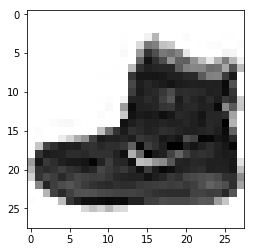

In [12]:
%matplotlib inline
plt.imshow(X_train[0].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

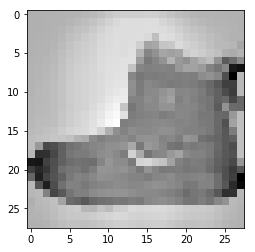

In [14]:
plt.imshow(X_train[0].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.imshow(X_train_scaled[0].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest')
plt.show()

In [15]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 1/6, random_state = 42)

In [16]:
print(y_val.shape)
print(y_train.shape)

(10000,)
(50000,)


In [17]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_val_scaled = scaler.fit_transform(X_val.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

Finer Grid Search TANH, multilayer search

In [18]:
Nron_size_list_FR = []
Train_error_list_FR = []
Val_error_list_FR = []
Train_time_list_FR = []
Val_time_list_FR = []

from sklearn.model_selection import train_test_split

for j in range(50,1200,50):

#[250, 275, 300,325, 350,375, 400, 425, 450, 784]:

    Nron_size_list_FR.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, activation_fn=tf.nn.tanh,feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=120,  steps=5500 )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_FR.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_FR.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_FR.append(Train_error)
    Val_error_list_FR.append(Val_error)
    
print("Nron_size_list_FR: ", Nron_size_list_FR)
print("Train_error_list_FR: ", Train_error_list_FR)
print("Val_error_list_FR: ", Val_error_list_FR)
print("Train_time_list_FR: ", Train_time_list_FR)
print("Val_time_list_FR: ", Val_time_list_FR)  

Neuron_set_size: 50
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpvhzjb22q\model.ckpt.
INFO:tensorflow:loss = 2.6579337, step = 0
INFO:tensorflow:global_step/sec: 679.651
INFO:tensorflow:loss = 0.51178914, step = 100 (0.149 sec)
INFO:tensorflow:global_step/sec: 774.493
INFO:tensorflow:loss = 0.56755483, step = 200 (0.128 sec)
INFO:tensorflow:global_step/sec: 780.537
INFO:tensorflow:loss = 0.33527878, step = 300 (0.128 sec)
INFO:tensorflow:global_step/sec: 792.928
INFO:tensorflow:loss = 0.4737135, step = 400 (0.126 sec)
INFO:tensorflow:global_step/se

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpvhzjb22q\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpvhzjb22q\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07038 / 0.11960000000000004
Neuron_set_size: 100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F790C5C0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_confi

INFO:tensorflow:loss = 0.24022682, step = 2200 (0.129 sec)
INFO:tensorflow:global_step/sec: 786.682
INFO:tensorflow:loss = 0.23945734, step = 2300 (0.126 sec)
INFO:tensorflow:global_step/sec: 786.686
INFO:tensorflow:loss = 0.28294945, step = 2400 (0.128 sec)
INFO:tensorflow:global_step/sec: 786.683
INFO:tensorflow:loss = 0.253642, step = 2500 (0.126 sec)
INFO:tensorflow:global_step/sec: 762.667
INFO:tensorflow:loss = 0.22497354, step = 2600 (0.132 sec)
INFO:tensorflow:global_step/sec: 751.191
INFO:tensorflow:loss = 0.20339784, step = 2700 (0.132 sec)
INFO:tensorflow:global_step/sec: 756.89
INFO:tensorflow:loss = 0.24630381, step = 2800 (0.132 sec)
INFO:tensorflow:global_step/sec: 756.887
INFO:tensorflow:loss = 0.29269025, step = 2900 (0.132 sec)
INFO:tensorflow:global_step/sec: 768.532
INFO:tensorflow:loss = 0.20258336, step = 3000 (0.131 sec)
INFO:tensorflow:global_step/sec: 762.665
INFO:tensorflow:loss = 0.18912683, step = 3100 (0.131 sec)
INFO:tensorflow:global_step/sec: 751.196
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp75yc1qr6\model.ckpt.
INFO:tensorflow:loss = 2.6889753, step = 0
INFO:tensorflow:global_step/sec: 624.436
INFO:tensorflow:loss = 0.47260052, step = 100 (0.160 sec)
INFO:tensorflow:global_step/sec: 605.507
INFO:tensorflow:loss = 0.5765926, step = 200 (0.166 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.32834727, step = 300 (0.144 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.48664892, step = 400 (0.150 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.3003613, step = 500 (0.143 sec)
INFO:tensorflow:global_step/sec: 601.862
INFO:tensorflow:loss = 0.2569701, step = 600 (0.166 sec)
INFO:tensorflow:global_step/sec: 605.513
INFO:tensorflow:loss = 0.45143732, step = 700 (0.166 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp75yc1qr6\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp75yc1qr6\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04930000000000001 / 0.11270000000000002
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C6ABA90>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:global_step/sec: 774.49
INFO:tensorflow:loss = 0.42952436, step = 1000 (0.129 sec)
INFO:tensorflow:global_step/sec: 799.276
INFO:tensorflow:loss = 0.27021557, step = 1100 (0.126 sec)
INFO:tensorflow:global_step/sec: 792.925
INFO:tensorflow:loss = 0.23101658, step = 1200 (0.125 sec)
INFO:tensorflow:global_step/sec: 774.488
INFO:tensorflow:loss = 0.2207056, step = 1300 (0.129 sec)
INFO:tensorflow:global_step/sec: 792.931
INFO:tensorflow:loss = 0.29397386, step = 1400 (0.126 sec)
INFO:tensorflow:global_step/sec: 780.542
INFO:tensorflow:loss = 0.40259933, step = 1500 (0.129 sec)
INFO:tensorflow:global_step/sec: 684.301
INFO:tensorflow:loss = 0.23204023, step = 1600 (0.146 sec)
INFO:tensorflow:global_step/sec: 577.515
INFO:tensorflow:loss = 0.29520005, step = 1700 (0.172 sec)
INFO:tensorflow:global_step/sec: 786.683
INFO:tensorflow:loss = 0.17760018, step = 1800 (0.127 sec)
INFO:tensorflow:global_step/sec: 574.19
INFO:tensorflow:loss = 0.29121712, step = 1900 (0.175 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmppwkl2w7j\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04752000000000001 / 0.11180000000000001
Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712296860>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:global_step/sec: 661.637
INFO:tensorflow:loss = 0.20167252, step = 4300 (0.152 sec)
INFO:tensorflow:global_step/sec: 558.159
INFO:tensorflow:loss = 0.21610698, step = 4400 (0.178 sec)
INFO:tensorflow:global_step/sec: 745.589
INFO:tensorflow:loss = 0.23024075, step = 4500 (0.135 sec)
INFO:tensorflow:global_step/sec: 740.068
INFO:tensorflow:loss = 0.11489451, step = 4600 (0.134 sec)
INFO:tensorflow:global_step/sec: 780.54
INFO:tensorflow:loss = 0.18790178, step = 4700 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.531
INFO:tensorflow:loss = 0.13625158, step = 4800 (0.129 sec)
INFO:tensorflow:global_step/sec: 561.28
INFO:tensorflow:loss = 0.2820999, step = 4900 (0.179 sec)
INFO:tensorflow:global_step/sec: 756.899
INFO:tensorflow:loss = 0.18722007, step = 5000 (0.131 sec)
INFO:tensorflow:global_step/sec: 729.262
INFO:tensorflow:loss = 0.082590796, step = 5100 (0.138 sec)
INFO:tensorflow:global_step/sec: 745.596
INFO:tensorflow:loss = 0.19253796, step = 5200 (0.134 sec)
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpy1x48dgt\model.ckpt.
INFO:tensorflow:loss = 2.932531, step = 0
INFO:tensorflow:global_step/sec: 605.511
INFO:tensorflow:loss = 0.46297437, step = 100 (0.165 sec)
INFO:tensorflow:global_step/sec: 684.305
INFO:tensorflow:loss = 0.5862578, step = 200 (0.146 sec)
INFO:tensorflow:global_step/sec: 751.198
INFO:tensorflow:loss = 0.34909663, step = 300 (0.133 sec)
INFO:tensorflow:global_step/sec: 768.535
INFO:tensorflow:loss = 0.46884748, step = 400 (0.131 sec)
INFO:tensorflow:global_step/sec: 762.665
INFO:tensorflow:loss = 0.26687282, step = 500 (0.131 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.27907047, step = 600 (0.143 sec)
INFO:tensorflow:global_step/sec: 661.648
INFO:tensorflow:loss = 0.43179825, step = 700 (0.151 sec

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpy1x48dgt\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpy1x48dgt\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04518 / 0.11160000000000003
Neuron_set_size: 350
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712220F60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_s

INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.18519539, step = 2600 (0.135 sec)
INFO:tensorflow:global_step/sec: 745.589
INFO:tensorflow:loss = 0.16389039, step = 2700 (0.133 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.23046325, step = 2800 (0.139 sec)
INFO:tensorflow:global_step/sec: 756.887
INFO:tensorflow:loss = 0.19479701, step = 2900 (0.133 sec)
INFO:tensorflow:global_step/sec: 768.531
INFO:tensorflow:loss = 0.17520125, step = 3000 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.532
INFO:tensorflow:loss = 0.16506685, step = 3100 (0.130 sec)
INFO:tensorflow:global_step/sec: 612.938
INFO:tensorflow:loss = 0.15015747, step = 3200 (0.163 sec)
INFO:tensorflow:global_step/sec: 561.286
INFO:tensorflow:loss = 0.26616722, step = 3300 (0.179 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.15561642, step = 3400 (0.181 sec)
INFO:tensorflow:global_step/sec: 689.032
INFO:tensorflow:loss = 0.17052005, step = 3500 (0.145 sec)
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpi88vownt\model.ckpt.
INFO:tensorflow:loss = 2.7271762, step = 0
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.45127574, step = 100 (0.160 sec)
INFO:tensorflow:global_step/sec: 762.666
INFO:tensorflow:loss = 0.5716132, step = 200 (0.131 sec)
INFO:tensorflow:global_step/sec: 751.198
INFO:tensorflow:loss = 0.34153712, step = 300 (0.133 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.4950298, step = 400 (0.140 sec)
INFO:tensorflow:global_step/sec: 652.999
INFO:tensorflow:loss = 0.26059976, step = 500 (0.154 sec)
INFO:tensorflow:global_step/sec: 751.199
INFO:tensorflow:loss = 0.25111574, step = 600 (0.132 sec)
INFO:tensorflow:global_step/sec: 734.626
INFO:tensorflow:loss = 0.44704077, step = 700 (0.136 sec

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpi88vownt\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpi88vownt\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04518 / 0.10960000000000003
Neuron_set_size: 450
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7454EF1D0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fractio

INFO:tensorflow:global_step/sec: 734.626
INFO:tensorflow:loss = 0.41427705, step = 1000 (0.136 sec)
INFO:tensorflow:global_step/sec: 762.663
INFO:tensorflow:loss = 0.27591935, step = 1100 (0.131 sec)
INFO:tensorflow:global_step/sec: 756.887
INFO:tensorflow:loss = 0.2299563, step = 1200 (0.133 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.24291754, step = 1300 (0.133 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.2924385, step = 1400 (0.134 sec)
INFO:tensorflow:global_step/sec: 756.888
INFO:tensorflow:loss = 0.42595515, step = 1500 (0.132 sec)
INFO:tensorflow:global_step/sec: 734.625
INFO:tensorflow:loss = 0.23097244, step = 1600 (0.136 sec)
INFO:tensorflow:global_step/sec: 740.068
INFO:tensorflow:loss = 0.29492694, step = 1700 (0.135 sec)
INFO:tensorflow:global_step/sec: 751.199
INFO:tensorflow:loss = 0.17161517, step = 1800 (0.133 sec)
INFO:tensorflow:global_step/sec: 745.584
INFO:tensorflow:loss = 0.2824537, step = 1900 (0.135 sec)
INFO:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpcbhs0oib\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.045399999999999996 / 0.10880000000000001
Neuron_set_size: 500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C710E584E0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 740.066
INFO:tensorflow:loss = 0.20898695, step = 4300 (0.134 sec)
INFO:tensorflow:global_step/sec: 740.064
INFO:tensorflow:loss = 0.22899827, step = 4400 (0.136 sec)
INFO:tensorflow:global_step/sec: 740.069
INFO:tensorflow:loss = 0.20765114, step = 4500 (0.134 sec)
INFO:tensorflow:global_step/sec: 740.068
INFO:tensorflow:loss = 0.114926085, step = 4600 (0.135 sec)
INFO:tensorflow:global_step/sec: 740.065
INFO:tensorflow:loss = 0.19484507, step = 4700 (0.136 sec)
INFO:tensorflow:global_step/sec: 745.593
INFO:tensorflow:loss = 0.15857278, step = 4800 (0.133 sec)
INFO:tensorflow:global_step/sec: 577.508
INFO:tensorflow:loss = 0.27807796, step = 4900 (0.174 sec)
INFO:tensorflow:global_step/sec: 570.909
INFO:tensorflow:loss = 0.16287325, step = 5000 (0.174 sec)
INFO:tensorflow:global_step/sec: 740.066
INFO:tensorflow:loss = 0.07451662, step = 5100 (0.135 sec)
INFO:tensorflow:global_step/sec: 751.196
INFO:tensorflow:loss = 0.16243601, step = 5200 (0.134 sec)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpu0qmcwle\model.ckpt.
INFO:tensorflow:loss = 2.4633703, step = 0
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.4499405, step = 100 (0.156 sec)
INFO:tensorflow:global_step/sec: 751.196
INFO:tensorflow:loss = 0.57917917, step = 200 (0.133 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.33623248, step = 300 (0.150 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.48379853, step = 400 (0.157 sec)
INFO:tensorflow:global_step/sec: 762.666
INFO:tensorflow:loss = 0.2834851, step = 500 (0.131 sec)
INFO:tensorflow:global_step/sec: 751.196
INFO:tensorflow:loss = 0.26548898, step = 600 (0.133 sec)
INFO:tensorflow:global_step/sec: 751.194
INFO:tensorflow:loss = 0.45724717, step = 700 (0.133 sec

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpu0qmcwle\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpu0qmcwle\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04622000000000004 / 0.11439999999999995
Neuron_set_size: 600
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C46DE10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_se

INFO:tensorflow:loss = 0.24414165, step = 2500 (0.138 sec)
INFO:tensorflow:global_step/sec: 632.334
INFO:tensorflow:loss = 0.19355369, step = 2600 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.362
INFO:tensorflow:loss = 0.1646653, step = 2700 (0.160 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.2614811, step = 2800 (0.139 sec)
INFO:tensorflow:global_step/sec: 616.725
INFO:tensorflow:loss = 0.19910456, step = 2900 (0.162 sec)
INFO:tensorflow:global_step/sec: 624.43
INFO:tensorflow:loss = 0.17861097, step = 3000 (0.160 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.16911653, step = 3100 (0.144 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.1414215, step = 3200 (0.159 sec)
INFO:tensorflow:global_step/sec: 612.942
INFO:tensorflow:loss = 0.2719439, step = 3300 (0.163 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.1886741, step = 3400 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:t

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp7_gtl4t3\model.ckpt.
INFO:tensorflow:loss = 2.7602332, step = 0
INFO:tensorflow:global_step/sec: 531.43
INFO:tensorflow:loss = 0.46107, step = 100 (0.189 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.628628, step = 200 (0.147 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.3510976, step = 300 (0.139 sec)
INFO:tensorflow:global_step/sec: 734.624
INFO:tensorflow:loss = 0.51717675, step = 400 (0.136 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.27239338, step = 500 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.2628608, step = 600 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.4442882, step = 700 (0.141 sec)
INFO:t

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp7_gtl4t3\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp7_gtl4t3\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04908000000000001 / 0.11370000000000002
Neuron_set_size: 700
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C745567EB8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.43749273, step = 1000 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.2884274, step = 1100 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.25266236, step = 1200 (0.141 sec)
INFO:tensorflow:global_step/sec: 740.068
INFO:tensorflow:loss = 0.23876336, step = 1300 (0.134 sec)
INFO:tensorflow:global_step/sec: 768.528
INFO:tensorflow:loss = 0.3106471, step = 1400 (0.131 sec)
INFO:tensorflow:global_step/sec: 745.592
INFO:tensorflow:loss = 0.44510776, step = 1500 (0.133 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.21872948, step = 1600 (0.141 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.2720144, step = 1700 (0.158 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.18499699, step = 1800 (0.142 sec)
INFO:tensorflow:global_step/sec: 598.261
INFO:tensorflow:loss = 0.25838935, step = 1900 (0.167 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpn66d0mu2\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.05174000000000001 / 0.11460000000000004
Neuron_set_size: 750
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71236FB70>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:global_step/sec: 570.917
INFO:tensorflow:loss = 0.18997373, step = 4300 (0.176 sec)
INFO:tensorflow:global_step/sec: 528.621
INFO:tensorflow:loss = 0.2290342, step = 4400 (0.188 sec)
INFO:tensorflow:global_step/sec: 520.357
INFO:tensorflow:loss = 0.22546326, step = 4500 (0.193 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.11385269, step = 4600 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.18890773, step = 4700 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.16399914, step = 4800 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.30989683, step = 4900 (0.140 sec)
INFO:tensorflow:global_step/sec: 729.262
INFO:tensorflow:loss = 0.1717343, step = 5000 (0.137 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.07411806, step = 5100 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.15213236, step = 5200 (0.144 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp9bxc3uxk\model.ckpt.
INFO:tensorflow:loss = 2.6147287, step = 0
INFO:tensorflow:global_step/sec: 601.863
INFO:tensorflow:loss = 0.45677942, step = 100 (0.168 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.6172305, step = 200 (0.144 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.32882622, step = 300 (0.146 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.527564, step = 400 (0.149 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.29076597, step = 500 (0.141 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.25282365, step = 600 (0.145 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.43582734, step = 700 (0.140 sec)

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp9bxc3uxk\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp9bxc3uxk\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.05037999999999998 / 0.1109
Neuron_set_size: 850
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712315320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_sa

INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.20626698, step = 2600 (0.145 sec)
INFO:tensorflow:global_step/sec: 689.026
INFO:tensorflow:loss = 0.17457862, step = 2700 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.2671231, step = 2800 (0.145 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.22411557, step = 2900 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.17183176, step = 3000 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.15622312, step = 3100 (0.140 sec)
INFO:tensorflow:global_step/sec: 497.059
INFO:tensorflow:loss = 0.1377812, step = 3200 (0.202 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.28669196, step = 3300 (0.141 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.20170473, step = 3400 (0.161 sec)
INFO:tensorflow:global_step/sec: 504.591
INFO:tensorflow:loss = 0.20546834, step = 3500 (0.197 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp4jg5triu\model.ckpt.
INFO:tensorflow:loss = 2.6204524, step = 0
INFO:tensorflow:global_step/sec: 624.433
INFO:tensorflow:loss = 0.4606657, step = 100 (0.161 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.6193161, step = 200 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.3427079, step = 300 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.51379025, step = 400 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.29047155, step = 500 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.25564986, step = 600 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.46232116, step = 700 (0.141 sec)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4jg5triu\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4jg5triu\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.05378000000000005 / 0.11260000000000003
Neuron_set_size: 950
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C710F95470>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.45373398, step = 1000 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.29222044, step = 1100 (0.147 sec)
INFO:tensorflow:global_step/sec: 679.657
INFO:tensorflow:loss = 0.25526634, step = 1200 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.24329215, step = 1300 (0.148 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.33272213, step = 1400 (0.147 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.45102584, step = 1500 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.24829368, step = 1600 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.30384207, step = 1700 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.1780925, step = 1800 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.28010166, step = 1900 (0.145 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpl1wyj9sl\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.05459999999999998 / 0.11529999999999996
Neuron_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C72CDD4080>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.19403432, step = 4300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.24154523, step = 4400 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.569
INFO:tensorflow:loss = 0.22161451, step = 4500 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.1255782, step = 4600 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.21400131, step = 4700 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.15586951, step = 4800 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.2816694, step = 4900 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.19981489, step = 5000 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.093681715, step = 5100 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.17478517, step = 5200 (0.144 sec)
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmppsh8isen\model.ckpt.
INFO:tensorflow:loss = 2.9248354, step = 0
INFO:tensorflow:global_step/sec: 584.263
INFO:tensorflow:loss = 0.47498238, step = 100 (0.172 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.6132419, step = 200 (0.147 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.35551608, step = 300 (0.146 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.5482024, step = 400 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.29394886, step = 500 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.26312777, step = 600 (0.146 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.48204356, step = 700 (0.155 sec)

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmppsh8isen\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmppsh8isen\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.056579999999999964 / 0.1149
Neuron_set_size: 1100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C3616A0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_

INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.22464778, step = 2600 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.18097606, step = 2700 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.2791161, step = 2800 (0.148 sec)
INFO:tensorflow:global_step/sec: 540.045
INFO:tensorflow:loss = 0.21392305, step = 2900 (0.185 sec)
INFO:tensorflow:global_step/sec: 456.207
INFO:tensorflow:loss = 0.18890254, step = 3000 (0.219 sec)
INFO:tensorflow:global_step/sec: 657.299
INFO:tensorflow:loss = 0.16367505, step = 3100 (0.153 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.13265625, step = 3200 (0.148 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.30762073, step = 3300 (0.154 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.21319361, step = 3400 (0.153 sec)
INFO:tensorflow:global_step/sec: 675.057
INFO:tensorflow:loss = 0.19013204, step = 3500 (0.149 sec)
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmprmpb18t4\model.ckpt.
INFO:tensorflow:loss = 2.610407, step = 0
INFO:tensorflow:global_step/sec: 594.698
INFO:tensorflow:loss = 0.4440834, step = 100 (0.169 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.6186999, step = 200 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.34354246, step = 300 (0.151 sec)
INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.55614716, step = 400 (0.158 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.3036375, step = 500 (0.151 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.24510893, step = 600 (0.147 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.479938, step = 700 (0.150 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmprmpb18t4\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmprmpb18t4\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.05681999999999998 / 0.11450000000000005
Nron_size_list_FR:  [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150]
Train_error_list_FR:  [0.07038, 0.05510000000000004, 0.04930000000000001, 0.04752000000000001, 0.044239999999999946, 0.04518, 0.04613999999999996, 0.04518, 0.045399999999999996, 0.04612000000000005, 0.04622000000000004, 0.04827999999999999, 0.04908000000000001, 0.05174000000000001, 0.05256000000000005, 0.05037999999999998, 0.053059999999999996, 0

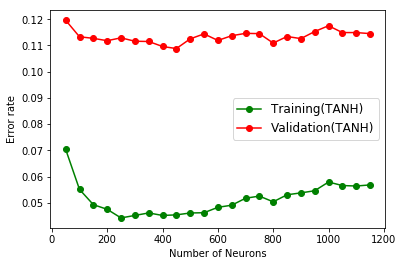

In [19]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(TANH)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(TANH)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
#plt.xlim(0, 1000)

In [20]:
Nron_opt1 = Nron_size_list_FR[np.argmin(Val_error_list_FR)]
Nron_opt1

450

In [21]:
Nron_size_list_FR = []
Train_error_list_FR = []
Val_error_list_FR = []
Train_time_list_FR = []
Val_time_list_FR = []

from sklearn.model_selection import train_test_split

for j in range(50,1200,50):

#[250, 275, 300,325, 350,375, 400, 425, 450, 784]:

    Nron_size_list_FR.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,j], n_classes=10, activation_fn=tf.nn.tanh,feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=120,  steps=5500 )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_FR.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_FR.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_FR.append(Train_error)
    Val_error_list_FR.append(Val_error)
    
print("Nron_size_list_FR: ", Nron_size_list_FR)
print("Train_error_list_FR: ", Train_error_list_FR)
print("Val_error_list_FR: ", Val_error_list_FR)
print("Train_time_list_FR: ", Train_time_list_FR)
print("Val_time_list_FR: ", Val_time_list_FR)  

Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F7BBBB38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpwkvb9l4r'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:loss = 0.15814616, step = 4000 (0.142 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.17970265, step = 4100 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0949481, step = 4200 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.18907598, step = 4300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.20235227, step = 4400 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.19965617, step = 4500 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.070975095, step = 4600 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.14419502, step = 4700 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.13030015, step = 4800 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.24620223, step = 4900 (0.140 sec)
INFO:tensorflow:global_step/sec: 666.06
I

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71231B668>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmph43mi4ua'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:loss = 0.16614659, step = 4000 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.18252651, step = 4100 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.12600592, step = 4200 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.313
INFO:tensorflow:loss = 0.17038637, step = 4300 (0.146 sec)
INFO:tensorflow:global_step/sec: 698.661
INFO:tensorflow:loss = 0.16314887, step = 4400 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.16597529, step = 4500 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.05601236, step = 4600 (0.142 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.16493702, step = 4700 (0.145 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.11200153, step = 4800 (0.140 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.24341916, step = 4900 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.585


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C710E5C898>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp6au_gyon'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:loss = 0.16548309, step = 4000 (0.148 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.18312946, step = 4100 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.095429435, step = 4200 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.17380643, step = 4300 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.17365013, step = 4400 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.19477113, step = 4500 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.07056808, step = 4600 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.15109965, step = 4700 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0956495, step = 4800 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.21038641, step = 4900 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C46D048>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp_in1k0dx'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.13453643, step = 4100 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.10973605, step = 4200 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.16591543, step = 4300 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.17104742, step = 4400 (0.144 sec)
INFO:tensorflow:global_step/sec: 620.555
INFO:tensorflow:loss = 0.17897135, step = 4500 (0.161 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.062496234, step = 4600 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.14415966, step = 4700 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.11018846, step = 4800 (0.142 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.21377052, step = 4900 (0.146 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.15176354, step = 5000 (0.143 sec)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F78B4F28>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmppv6jmyaj'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.14133035, step = 4100 (0.145 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.09540559, step = 4200 (0.148 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.18096948, step = 4300 (0.148 sec)
INFO:tensorflow:global_step/sec: 689.031
INFO:tensorflow:loss = 0.17911331, step = 4400 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.661
INFO:tensorflow:loss = 0.18199323, step = 4500 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.0909987, step = 4600 (0.145 sec)
INFO:tensorflow:global_step/sec: 689.031
INFO:tensorflow:loss = 0.15469745, step = 4700 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.057
INFO:tensorflow:loss = 0.10985082, step = 4800 (0.147 sec)
INFO:tensorflow:global_step/sec: 689.031
INFO:tensorflow:loss = 0.20117877, step = 4900 (0.145 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.15037337, step = 5000 (0.146 sec)
IN

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7458CBE10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpeamve_4x'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.09795737, step = 4200 (0.144 sec)
INFO:tensorflow:global_step/sec: 684.306
INFO:tensorflow:loss = 0.15557505, step = 4300 (0.147 sec)
INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.17719217, step = 4400 (0.145 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.19954732, step = 4500 (0.144 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.064899236, step = 4600 (0.152 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.15881874, step = 4700 (0.147 sec)
INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.09948744, step = 4800 (0.147 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.2264947, step = 4900 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.1620031, step = 5000 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.048741594, step = 5100 (0.147 sec)
I

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C710EC9860>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmps99g4dv9'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 657.293
INFO:tensorflow:loss = 0.107191324, step = 4200 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.14007135, step = 4300 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.18552774, step = 4400 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.1599751, step = 4500 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.07359466, step = 4600 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.058
INFO:tensorflow:loss = 0.15604255, step = 4700 (0.150 sec)
INFO:tensorflow:global_step/sec: 628.361
INFO:tensorflow:loss = 0.1152579, step = 4800 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.334
INFO:tensorflow:loss = 0.21931435, step = 4900 (0.158 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.16271219, step = 5000 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.051817205, step = 5100 (0.152 sec)
INF

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71296B358>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpyr021v4r'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.11101127, step = 4200 (0.156 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.15885928, step = 4300 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.447
INFO:tensorflow:loss = 0.18074627, step = 4400 (0.156 sec)
INFO:tensorflow:global_step/sec: 652.997
INFO:tensorflow:loss = 0.18498771, step = 4500 (0.152 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.07873883, step = 4600 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.064
INFO:tensorflow:loss = 0.1864787, step = 4700 (0.150 sec)
INFO:tensorflow:global_step/sec: 652.999
INFO:tensorflow:loss = 0.10991891, step = 4800 (0.153 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.20619678, step = 4900 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.18313664, step = 5000 (0.155 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.053339567, step = 5100 (0.152 sec)


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712882668>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpp478t3lb'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.12528625, step = 4200 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.15857105, step = 4300 (0.151 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.18451169, step = 4400 (0.152 sec)
INFO:tensorflow:global_step/sec: 512.353
INFO:tensorflow:loss = 0.16958551, step = 4500 (0.196 sec)
INFO:tensorflow:global_step/sec: 548.952
INFO:tensorflow:loss = 0.07736078, step = 4600 (0.181 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.15680027, step = 4700 (0.151 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.11761606, step = 4800 (0.147 sec)
INFO:tensorflow:global_step/sec: 679.651
INFO:tensorflow:loss = 0.2559533, step = 4900 (0.147 sec)
INFO:tensorflow:global_step/sec: 636.355
INFO:tensorflow:loss = 0.15890853, step = 5000 (0.158 sec)
INFO:tensorflow:global_step/sec: 448.027
INFO:tensorflow:loss = 0.055699605, step = 5100 (0.222 sec)
I

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F7BB5978>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp8d03z_s6'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.14077148, step = 4200 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.16227178, step = 4300 (0.147 sec)
INFO:tensorflow:global_step/sec: 684.306
INFO:tensorflow:loss = 0.1980571, step = 4400 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.22747988, step = 4500 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.65
INFO:tensorflow:loss = 0.08938388, step = 4600 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.18356329, step = 4700 (0.148 sec)
INFO:tensorflow:global_step/sec: 587.702
INFO:tensorflow:loss = 0.117675625, step = 4800 (0.169 sec)
INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.26497632, step = 4900 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.16910012, step = 5000 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.058111914, step = 5100 (0.148 sec)
I

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F78F6BA8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpgib7q9c_'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 648.763
INFO:tensorflow:loss = 0.12828426, step = 4200 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.15579347, step = 4300 (0.151 sec)
INFO:tensorflow:global_step/sec: 653.004
INFO:tensorflow:loss = 0.18149614, step = 4400 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.524
INFO:tensorflow:loss = 0.1905848, step = 4500 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.653
INFO:tensorflow:loss = 0.0818892, step = 4600 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.16907191, step = 4700 (0.153 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.11470394, step = 4800 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.25306866, step = 4900 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.294
INFO:tensorflow:loss = 0.15402597, step = 5000 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.053951725, step = 5100 (0.151 sec)
I

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C697B70>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpt554kgie'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.10597574, step = 4200 (0.155 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.1533708, step = 4300 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.20445482, step = 4400 (0.151 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.21405299, step = 4500 (0.152 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.071152315, step = 4600 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.16636537, step = 4700 (0.150 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.12624368, step = 4800 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.24719982, step = 4900 (0.155 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.15642029, step = 5000 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.05382682, step = 5100 (0.150 sec)
IN

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7121F3B00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp0wj584_f'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.08970559, step = 4200 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.355
INFO:tensorflow:loss = 0.14218518, step = 4300 (0.159 sec)
INFO:tensorflow:global_step/sec: 620.556
INFO:tensorflow:loss = 0.20620705, step = 4400 (0.161 sec)
INFO:tensorflow:global_step/sec: 632.334
INFO:tensorflow:loss = 0.21346943, step = 4500 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.07601752, step = 4600 (0.157 sec)
INFO:tensorflow:global_step/sec: 444.042
INFO:tensorflow:loss = 0.17498313, step = 4700 (0.225 sec)
INFO:tensorflow:global_step/sec: 636.36
INFO:tensorflow:loss = 0.12548886, step = 4800 (0.156 sec)
INFO:tensorflow:global_step/sec: 601.863
INFO:tensorflow:loss = 0.24867177, step = 4900 (0.166 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.18557556, step = 5000 (0.158 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.06211137, step = 5100 (0.158 sec)
I

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F793BEF0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp824rltte'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 640.439
INFO:tensorflow:loss = 0.11805537, step = 4200 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.447
INFO:tensorflow:loss = 0.12418927, step = 4300 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.441
INFO:tensorflow:loss = 0.20203584, step = 4400 (0.156 sec)
INFO:tensorflow:global_step/sec: 648.762
INFO:tensorflow:loss = 0.20560852, step = 4500 (0.154 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.08517865, step = 4600 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.441
INFO:tensorflow:loss = 0.19932249, step = 4700 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.13234328, step = 4800 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.22983941, step = 4900 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.17812136, step = 5000 (0.158 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.06668197, step = 5100 (0.156 sec)


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C711094B38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpsn19m4xo'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.14605622, step = 4200 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.16832632, step = 4300 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.21352093, step = 4400 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.20229816, step = 4500 (0.156 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.08871126, step = 4600 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.19791876, step = 4700 (0.159 sec)
INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.12773462, step = 4800 (0.157 sec)
INFO:tensorflow:global_step/sec: 612.938
INFO:tensorflow:loss = 0.25332224, step = 4900 (0.164 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.1972551, step = 5000 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.06955067, step = 5100 (0.158 sec)
I

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7122FD278>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpjdsbhtkq'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.119215235, step = 4200 (0.159 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.16916977, step = 4300 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.20294265, step = 4400 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.21987264, step = 4500 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.087028585, step = 4600 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.19907127, step = 4700 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.13237415, step = 4800 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.28080174, step = 4900 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.36
INFO:tensorflow:loss = 0.1594526, step = 5000 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.07234062, step = 5100 (0.157 sec)


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F78F6240>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpeesxewq9'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 616.726
INFO:tensorflow:loss = 0.115108326, step = 4200 (0.161 sec)
INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.1592279, step = 4300 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.334
INFO:tensorflow:loss = 0.1937072, step = 4400 (0.158 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.23311588, step = 4500 (0.156 sec)
INFO:tensorflow:global_step/sec: 628.358
INFO:tensorflow:loss = 0.08419668, step = 4600 (0.159 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.20551787, step = 4700 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.13639893, step = 4800 (0.160 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.27397805, step = 4900 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.1634941, step = 5000 (0.157 sec)
INFO:tensorflow:global_step/sec: 624.435
INFO:tensorflow:loss = 0.06386812, step = 5100 (0.160 sec)
IN

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C711036CF8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp6m9truny'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 644.571
INFO:tensorflow:loss = 0.11733027, step = 4200 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.18222466, step = 4300 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.23434852, step = 4400 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.20036004, step = 4500 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.0882219, step = 4600 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.18934342, step = 4700 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.14917919, step = 4800 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.26004878, step = 4900 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.20960048, step = 5000 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.06344543, step = 5100 (0.157 sec)
I

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C8855F8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp51v7okfq'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 620.556
INFO:tensorflow:loss = 0.12773661, step = 4200 (0.161 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.17532295, step = 4300 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.44
INFO:tensorflow:loss = 0.19662091, step = 4400 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.22247627, step = 4500 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.339
INFO:tensorflow:loss = 0.08564348, step = 4600 (0.158 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.17969687, step = 4700 (0.156 sec)
INFO:tensorflow:global_step/sec: 624.43
INFO:tensorflow:loss = 0.12533987, step = 4800 (0.160 sec)
INFO:tensorflow:global_step/sec: 632.338
INFO:tensorflow:loss = 0.25953913, step = 4900 (0.158 sec)
INFO:tensorflow:global_step/sec: 601.859
INFO:tensorflow:loss = 0.18026818, step = 5000 (0.167 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.07208942, step = 5100 (0.154 sec)
IN

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7122A1B70>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmptdoz7x3r'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.124749474, step = 4200 (0.157 sec)
INFO:tensorflow:global_step/sec: 648.758
INFO:tensorflow:loss = 0.15292017, step = 4300 (0.154 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.21791801, step = 4400 (0.152 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.22798465, step = 4500 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.07304849, step = 4600 (0.156 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.20550625, step = 4700 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.14378643, step = 4800 (0.155 sec)
INFO:tensorflow:global_step/sec: 577.509
INFO:tensorflow:loss = 0.24616489, step = 4900 (0.173 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.19696999, step = 5000 (0.155 sec)
INFO:tensorflow:global_step/sec: 652.998
INFO:tensorflow:loss = 0.07084255, step = 5100 (0.153 sec)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F78FE908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmps3j56rnp'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.11347874, step = 4200 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.16042672, step = 4300 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.359
INFO:tensorflow:loss = 0.21037994, step = 4400 (0.156 sec)
INFO:tensorflow:global_step/sec: 653.004
INFO:tensorflow:loss = 0.17470674, step = 4500 (0.154 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.072305016, step = 4600 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.19006795, step = 4700 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.14549725, step = 4800 (0.155 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.26430616, step = 4900 (0.158 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.20568106, step = 5000 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.069576345, step = 5100 (0.154 sec)


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C746142160>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp6xtbz8ac'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.14256616, step = 4200 (0.158 sec)
INFO:tensorflow:global_step/sec: 632.334
INFO:tensorflow:loss = 0.1568822, step = 4300 (0.158 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.21378733, step = 4400 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.18173523, step = 4500 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.08768995, step = 4600 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.21389674, step = 4700 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.12536679, step = 4800 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.23298074, step = 4900 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.34
INFO:tensorflow:loss = 0.21905495, step = 5000 (0.158 sec)
INFO:tensorflow:global_step/sec: 644.571
INFO:tensorflow:loss = 0.07270209, step = 5100 (0.155 sec)
IN

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C5F82E8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpnbwqv6fn'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.123261586, step = 4200 (0.156 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.16381307, step = 4300 (0.160 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.20943302, step = 4400 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.22193927, step = 4500 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.09172761, step = 4600 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.19259831, step = 4700 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.16390969, step = 4800 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.355
INFO:tensorflow:loss = 0.27914467, step = 4900 (0.158 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.18824069, step = 5000 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.06660752, step = 5100 (0.155 sec)

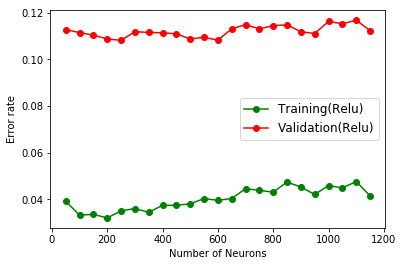

In [22]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(TANH)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(TANH)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
#plt.xlim(0, 1000)

In [23]:
Nron_opt2 = Nron_size_list_FR[np.argmin(Val_error_list_FR)]
Nron_opt2

250

In [43]:
Nron_size_list_FR = []
Train_error_list_FR = []
Val_error_list_FR = []
Train_time_list_FR = []
Val_time_list_FR = []

from sklearn.model_selection import train_test_split

for j in range(50,1200,50):

#[250, 275, 300,325, 350,375, 400, 425, 450, 784]:

    Nron_size_list_FR.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,Nron_opt2,j], n_classes=10, activation_fn=tf.nn.tanh,feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=100,  steps=5500 )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_FR.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_FR.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_FR.append(Train_error)
    Val_error_list_FR.append(Val_error)
    
print("Nron_size_list_FR: ", Nron_size_list_FR)
print("Train_error_list_FR: ", Train_error_list_FR)
print("Val_error_list_FR: ", Val_error_list_FR)
print("Train_time_list_FR: ", Train_time_list_FR)
print("Val_time_list_FR: ", Val_time_list_FR)  

Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7128CE898>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpulpcrk6i'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:loss = 0.2362677, step = 3000 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.647
INFO:tensorflow:loss = 0.23767433, step = 3100 (0.151 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.32481164, step = 3200 (0.154 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.2415078, step = 3300 (0.158 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.27393153, step = 3400 (0.155 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.17176022, step = 3500 (0.152 sec)
INFO:tensorflow:global_step/sec: 652.998
INFO:tensorflow:loss = 0.26897565, step = 3600 (0.152 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.15680516, step = 3700 (0.149 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.1862325, step = 3800 (0.153 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.19888571, step = 3900 (0.155 sec)
INFO:tensorflow:global_step/sec: 632.338
INFO:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpulpcrk6i\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.031179999999999986 / 0.10880000000000001
Neuron_set_size: 75
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C7A4BE0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.6503699, step = 200 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.353661, step = 300 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.38170612, step = 400 (0.151 sec)
INFO:tensorflow:global_step/sec: 657.299
INFO:tensorflow:loss = 0.31080025, step = 500 (0.151 sec)
INFO:tensorflow:global_step/sec: 653.002
INFO:tensorflow:loss = 0.2456729, step = 600 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.056
INFO:tensorflow:loss = 0.33732072, step = 700 (0.150 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.39344022, step = 800 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.25244766, step = 900 (0.147 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.19910675, step = 1000 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.25909516, step = 1100 (0.149 sec)
INFO:tensorfl

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpd2onfgvi\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpd2onfgvi\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03154000000000001 / 0.11119999999999997
Neuron_set_size: 100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C8F7BB5C18>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmped4z1rp6\model.ckpt.
INFO:tensorflow:loss = 2.52998, step = 0
INFO:tensorflow:global_step/sec: 426.964
INFO:tensorflow:loss = 0.38993764, step = 100 (0.235 sec)
INFO:tensorflow:global_step/sec: 469.058
INFO:tensorflow:loss = 0.64969915, step = 200 (0.212 sec)
INFO:tensorflow:global_step/sec: 502.055
INFO:tensorflow:loss = 0.35217527, step = 300 (0.200 sec)
INFO:tensorflow:global_step/sec: 609.203
INFO:tensorflow:loss = 0.40055096, step = 400 (0.163 sec)
INFO:tensorflow:global_step/sec: 675.058
INFO:tensorflow:loss = 0.32387486, step = 500 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.063
INFO:tensorflow:loss = 0.2507668, step = 600 (0.150 sec)
INFO:tensorflow:global_step/sec: 684.306
INFO:tensorflow:loss = 0.32882205, step = 700 (0.146 sec)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmped4z1rp6\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmped4z1rp6\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.028100000000000014 / 0.10799999999999998
Neuron_set_size: 125
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7162BC470>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpzcod626j\model.ckpt.
INFO:tensorflow:loss = 2.3701103, step = 0
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.37853086, step = 100 (0.183 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.6001198, step = 200 (0.153 sec)
INFO:tensorflow:global_step/sec: 648.756
INFO:tensorflow:loss = 0.34512284, step = 300 (0.153 sec)
INFO:tensorflow:global_step/sec: 661.652
INFO:tensorflow:loss = 0.39612222, step = 400 (0.151 sec)
INFO:tensorflow:global_step/sec: 653.002
INFO:tensorflow:loss = 0.30806407, step = 500 (0.154 sec)
INFO:tensorflow:global_step/sec: 657.294
INFO:tensorflow:loss = 0.24667242, step = 600 (0.152 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.32580972, step = 700 (0.151 sec

INFO:tensorflow:global_step/sec: 652.996
INFO:tensorflow:loss = 0.17525679, step = 4000 (0.152 sec)
INFO:tensorflow:global_step/sec: 653.002
INFO:tensorflow:loss = 0.09279049, step = 4100 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.16877571, step = 4200 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.569
INFO:tensorflow:loss = 0.089500464, step = 4300 (0.154 sec)
INFO:tensorflow:global_step/sec: 628.361
INFO:tensorflow:loss = 0.11040016, step = 4400 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.338
INFO:tensorflow:loss = 0.12807752, step = 4500 (0.158 sec)
INFO:tensorflow:global_step/sec: 661.643
INFO:tensorflow:loss = 0.12748161, step = 4600 (0.151 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.10866373, step = 4700 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.09739003, step = 4800 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.14620627, step = 4900 (0.150 sec)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpzcod626j\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.029839999999999978 / 0.10640000000000005
Neuron_set_size: 150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712B845F8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 675.058
INFO:tensorflow:loss = 0.24156657, step = 1200 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.27443647, step = 1300 (0.147 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.19862688, step = 1400 (0.151 sec)
INFO:tensorflow:global_step/sec: 675.064
INFO:tensorflow:loss = 0.2143293, step = 1500 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.268594, step = 1600 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.532
INFO:tensorflow:loss = 0.26024058, step = 1700 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.3608858, step = 1800 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.23883331, step = 1900 (0.147 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.3460219, step = 2000 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.24358185, step = 2100 (0.150 sec)
INFO:ten

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpvizvt_us\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpvizvt_us\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03176000000000001 / 0.10909999999999997
Neuron_set_size: 175
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7156DC8D0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_se

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp8e1r5zav\model.ckpt.
INFO:tensorflow:loss = 2.4443145, step = 0
INFO:tensorflow:global_step/sec: 537.145
INFO:tensorflow:loss = 0.38987812, step = 100 (0.186 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.63987905, step = 200 (0.151 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.37506527, step = 300 (0.153 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.3809838, step = 400 (0.150 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.29269847, step = 500 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.534
INFO:tensorflow:loss = 0.26413035, step = 600 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.647
INFO:tensorflow:loss = 0.3259638, step = 700 (0.150 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8e1r5zav\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8e1r5zav\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.030340000000000034 / 0.11170000000000002
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712B58FD0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpz0nim_8s\model.ckpt.
INFO:tensorflow:loss = 2.4468544, step = 0
INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.39214242, step = 100 (0.179 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.6645631, step = 200 (0.153 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.36105376, step = 300 (0.154 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.39216137, step = 400 (0.160 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.3007273, step = 500 (0.159 sec)
INFO:tensorflow:global_step/sec: 661.652
INFO:tensorflow:loss = 0.2605503, step = 600 (0.150 sec)
INFO:tensorflow:global_step/sec: 670.528
INFO:tensorflow:loss = 0.33847192, step = 700 (0.150 sec)

INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmpz0nim_8s\model.ckpt.
INFO:tensorflow:Loss for final step: 0.063531816.
dnn_1_clf_nron training time 10.353414
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpz0nim_8s\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpz0nim_8s\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.030259999999999954 / 0.11209999999999998
Neuron_set_size: 225
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C713F38FD0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_eve

INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.18012613, step = 2800 (0.151 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.22294642, step = 2900 (0.161 sec)
INFO:tensorflow:global_step/sec: 632.336
INFO:tensorflow:loss = 0.18824953, step = 3000 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.20013589, step = 3100 (0.157 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.30425748, step = 3200 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.758
INFO:tensorflow:loss = 0.21391322, step = 3300 (0.153 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.25278708, step = 3400 (0.158 sec)
INFO:tensorflow:global_step/sec: 648.763
INFO:tensorflow:loss = 0.16814564, step = 3500 (0.153 sec)
INFO:tensorflow:global_step/sec: 661.648
INFO:tensorflow:loss = 0.25738698, step = 3600 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.1339057, step = 3700 (0.155 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpnkdp0oqc\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03200000000000003 / 0.11050000000000004
Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7156DC4E0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.66729194, step = 200 (0.156 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.36883318, step = 300 (0.151 sec)
INFO:tensorflow:global_step/sec: 657.293
INFO:tensorflow:loss = 0.40718806, step = 400 (0.152 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.30070662, step = 500 (0.153 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.26154196, step = 600 (0.152 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.3489268, step = 700 (0.149 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.42166528, step = 800 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.22972548, step = 900 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.18929654, step = 1000 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.25051793, step = 1100 (0.151 sec)
INFO:tenso

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpb0qi5c9x\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpb0qi5c9x\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.028340000000000032 / 0.10770000000000002
Neuron_set_size: 275
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7162FC588>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpyyof5ttz\model.ckpt.
INFO:tensorflow:loss = 2.361118, step = 0
INFO:tensorflow:global_step/sec: 551.984
INFO:tensorflow:loss = 0.3786093, step = 100 (0.182 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.65821564, step = 200 (0.151 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.3803424, step = 300 (0.154 sec)
INFO:tensorflow:global_step/sec: 666.055
INFO:tensorflow:loss = 0.4120523, step = 400 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.657
INFO:tensorflow:loss = 0.30571654, step = 500 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.058
INFO:tensorflow:loss = 0.23624095, step = 600 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.35410264, step = 700 (0.153 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyyof5ttz\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyyof5ttz\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03166000000000002 / 0.10899999999999999
Neuron_set_size: 300
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7162FC630>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp450fx11i\model.ckpt.
INFO:tensorflow:loss = 2.2797532, step = 0
INFO:tensorflow:global_step/sec: 561.285
INFO:tensorflow:loss = 0.3729083, step = 100 (0.179 sec)
INFO:tensorflow:global_step/sec: 679.658
INFO:tensorflow:loss = 0.6579067, step = 200 (0.148 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.35479957, step = 300 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.056
INFO:tensorflow:loss = 0.3976404, step = 400 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.3150103, step = 500 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.26716587, step = 600 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.653
INFO:tensorflow:loss = 0.34362534, step = 700 (0.152 sec)
I

INFO:tensorflow:global_step/sec: 561.289
INFO:tensorflow:loss = 0.16326891, step = 4000 (0.177 sec)
INFO:tensorflow:global_step/sec: 601.859
INFO:tensorflow:loss = 0.09653859, step = 4100 (0.167 sec)
INFO:tensorflow:global_step/sec: 555.051
INFO:tensorflow:loss = 0.1613188, step = 4200 (0.179 sec)
INFO:tensorflow:global_step/sec: 561.286
INFO:tensorflow:loss = 0.0847735, step = 4300 (0.179 sec)
INFO:tensorflow:global_step/sec: 545.954
INFO:tensorflow:loss = 0.10299025, step = 4400 (0.183 sec)
INFO:tensorflow:global_step/sec: 542.981
INFO:tensorflow:loss = 0.13277406, step = 4500 (0.184 sec)
INFO:tensorflow:global_step/sec: 558.154
INFO:tensorflow:loss = 0.118456945, step = 4600 (0.179 sec)
INFO:tensorflow:global_step/sec: 564.456
INFO:tensorflow:loss = 0.11338926, step = 4700 (0.177 sec)
INFO:tensorflow:global_step/sec: 558.15
INFO:tensorflow:loss = 0.11795828, step = 4800 (0.179 sec)
INFO:tensorflow:global_step/sec: 548.949
INFO:tensorflow:loss = 0.12478822, step = 4900 (0.182 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp450fx11i\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.02951999999999999 / 0.1068
Neuron_set_size: 325
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C715F51B38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5

INFO:tensorflow:loss = 0.24482046, step = 1200 (0.178 sec)
INFO:tensorflow:global_step/sec: 570.911
INFO:tensorflow:loss = 0.30192947, step = 1300 (0.176 sec)
INFO:tensorflow:global_step/sec: 561.284
INFO:tensorflow:loss = 0.18192251, step = 1400 (0.178 sec)
INFO:tensorflow:global_step/sec: 555.051
INFO:tensorflow:loss = 0.21506841, step = 1500 (0.179 sec)
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.3191694, step = 1600 (0.177 sec)
INFO:tensorflow:global_step/sec: 548.953
INFO:tensorflow:loss = 0.2835642, step = 1700 (0.182 sec)
INFO:tensorflow:global_step/sec: 570.907
INFO:tensorflow:loss = 0.38423562, step = 1800 (0.175 sec)
INFO:tensorflow:global_step/sec: 577.51
INFO:tensorflow:loss = 0.24749844, step = 1900 (0.174 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.3525572, step = 2000 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.154
INFO:tensorflow:loss = 0.23986089, step = 2100 (0.178 sec)
INFO:tensorflow:global_step/sec: 580.862
INFO:

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8tnuryl6\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8tnuryl6\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.030259999999999954 / 0.1068
Neuron_set_size: 350
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71627DFD0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_s

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp6f2wqcsk\model.ckpt.
INFO:tensorflow:loss = 2.259964, step = 0
INFO:tensorflow:global_step/sec: 489.751
INFO:tensorflow:loss = 0.3993177, step = 100 (0.205 sec)
INFO:tensorflow:global_step/sec: 598.257
INFO:tensorflow:loss = 0.6483295, step = 200 (0.166 sec)
INFO:tensorflow:global_step/sec: 540.044
INFO:tensorflow:loss = 0.4056713, step = 300 (0.186 sec)
INFO:tensorflow:global_step/sec: 567.672
INFO:tensorflow:loss = 0.411644, step = 400 (0.176 sec)
INFO:tensorflow:global_step/sec: 564.456
INFO:tensorflow:loss = 0.31816268, step = 500 (0.177 sec)
INFO:tensorflow:global_step/sec: 648.762
INFO:tensorflow:loss = 0.25355995, step = 600 (0.154 sec)
INFO:tensorflow:global_step/sec: 558.151
INFO:tensorflow:loss = 0.35012925, step = 700 (0.179 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp6f2wqcsk\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp6f2wqcsk\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03180000000000005 / 0.11109999999999998
Neuron_set_size: 375
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C715E770F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpvstnhnu_\model.ckpt.
INFO:tensorflow:loss = 2.3379304, step = 0
INFO:tensorflow:global_step/sec: 364.631
INFO:tensorflow:loss = 0.37975368, step = 100 (0.276 sec)
INFO:tensorflow:global_step/sec: 428.797
INFO:tensorflow:loss = 0.67336303, step = 200 (0.233 sec)
INFO:tensorflow:global_step/sec: 605.508
INFO:tensorflow:loss = 0.38195968, step = 300 (0.164 sec)
INFO:tensorflow:global_step/sec: 652.998
INFO:tensorflow:loss = 0.39705813, step = 400 (0.153 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.29551813, step = 500 (0.156 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.26502004, step = 600 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.36756614, step = 700 (0.151 s

INFO:tensorflow:global_step/sec: 661.648
INFO:tensorflow:loss = 0.1194659, step = 4500 (0.152 sec)
INFO:tensorflow:global_step/sec: 657.299
INFO:tensorflow:loss = 0.11538333, step = 4600 (0.151 sec)
INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.096286066, step = 4700 (0.153 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.0977232, step = 4800 (0.151 sec)
INFO:tensorflow:global_step/sec: 432.506
INFO:tensorflow:loss = 0.13516864, step = 4900 (0.231 sec)
INFO:tensorflow:global_step/sec: 484.996
INFO:tensorflow:loss = 0.05841889, step = 5000 (0.207 sec)
INFO:tensorflow:global_step/sec: 653.002
INFO:tensorflow:loss = 0.061906803, step = 5100 (0.152 sec)
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.10254951, step = 5200 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.064
INFO:tensorflow:loss = 0.13399957, step = 5300 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.056
INFO:tensorflow:loss = 0.17053093, step = 5400 (0.151 sec)
INFO:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpvstnhnu_\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.031420000000000003 / 0.10919999999999996
Neuron_set_size: 400
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C713F4E4A8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:loss = 0.23165113, step = 2200 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.21518181, step = 2300 (0.150 sec)
INFO:tensorflow:global_step/sec: 487.361
INFO:tensorflow:loss = 0.22000404, step = 2400 (0.206 sec)
INFO:tensorflow:global_step/sec: 460.413
INFO:tensorflow:loss = 0.2823555, step = 2500 (0.217 sec)
INFO:tensorflow:global_step/sec: 497.061
INFO:tensorflow:loss = 0.11655563, step = 2600 (0.201 sec)
INFO:tensorflow:global_step/sec: 657.29
INFO:tensorflow:loss = 0.16335043, step = 2700 (0.152 sec)
INFO:tensorflow:global_step/sec: 653.003
INFO:tensorflow:loss = 0.18994957, step = 2800 (0.152 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.22157636, step = 2900 (0.155 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.19272266, step = 3000 (0.151 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.21119909, step = 3100 (0.158 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpfw07p4so\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.030959999999999988 / 0.10919999999999996
Neuron_set_size: 425
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71239F0F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpgirqa53t\model.ckpt.
INFO:tensorflow:loss = 2.5511951, step = 0
INFO:tensorflow:global_step/sec: 548.95
INFO:tensorflow:loss = 0.40158436, step = 100 (0.183 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.64068377, step = 200 (0.157 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.38148335, step = 300 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.42511705, step = 400 (0.152 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.30034268, step = 500 (0.158 sec)
INFO:tensorflow:global_step/sec: 661.655
INFO:tensorflow:loss = 0.27978954, step = 600 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.058
INFO:tensorflow:loss = 0.365872, step = 700 (0.150 sec)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpgirqa53t\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpgirqa53t\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.030059999999999976 / 0.1079
Neuron_set_size: 450
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C4C0B00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fractio

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp69c8pomc\model.ckpt.
INFO:tensorflow:loss = 2.4388108, step = 0
INFO:tensorflow:global_step/sec: 534.273
INFO:tensorflow:loss = 0.35998806, step = 100 (0.188 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.65946966, step = 200 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.39317364, step = 300 (0.154 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.38298795, step = 400 (0.152 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.32177198, step = 500 (0.156 sec)
INFO:tensorflow:global_step/sec: 657.294
INFO:tensorflow:loss = 0.258778, step = 600 (0.152 sec)
INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.3639398, step = 700 (0.157 sec)
I

INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.06488067, step = 5000 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.07002659, step = 5100 (0.153 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.09420024, step = 5200 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.12594905, step = 5300 (0.157 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.17426725, step = 5400 (0.150 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmp69c8pomc\model.ckpt.
INFO:tensorflow:Loss for final step: 0.060879543.
dnn_1_clf_nron training time 9.623751
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp69c8pomc\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp69c8pomc\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.030379999999999963 / 0.10929999999999995
Neuron_set_size: 475
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7124661D0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:loss = 0.24742134, step = 2200 (0.229 sec)
INFO:tensorflow:global_step/sec: 487.361
INFO:tensorflow:loss = 0.23166923, step = 2300 (0.204 sec)
INFO:tensorflow:global_step/sec: 423.343
INFO:tensorflow:loss = 0.24745035, step = 2400 (0.236 sec)
INFO:tensorflow:global_step/sec: 423.343
INFO:tensorflow:loss = 0.30973914, step = 2500 (0.235 sec)
INFO:tensorflow:global_step/sec: 648.762
INFO:tensorflow:loss = 0.11351157, step = 2600 (0.154 sec)
INFO:tensorflow:global_step/sec: 446.022
INFO:tensorflow:loss = 0.177835, step = 2700 (0.225 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.18571386, step = 2800 (0.182 sec)
INFO:tensorflow:global_step/sec: 661.648
INFO:tensorflow:loss = 0.20649268, step = 2900 (0.151 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.2017083, step = 3000 (0.153 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.2097181, step = 3100 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.762
INFO

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp9emlh1rb\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03590000000000004 / 0.10999999999999999
Neuron_set_size: 500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C715BBD320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpxykodk6p\model.ckpt.
INFO:tensorflow:loss = 2.3394425, step = 0
INFO:tensorflow:global_step/sec: 480.333
INFO:tensorflow:loss = 0.37994397, step = 100 (0.209 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.63278407, step = 200 (0.155 sec)
INFO:tensorflow:global_step/sec: 639.422
INFO:tensorflow:loss = 0.38892365, step = 300 (0.155 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.42751908, step = 400 (0.153 sec)
INFO:tensorflow:global_step/sec: 632.336
INFO:tensorflow:loss = 0.31492198, step = 500 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.27032557, step = 600 (0.157 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.3626154, step = 700 (0.154 se

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpxykodk6p\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpxykodk6p\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03293999999999997 / 0.11150000000000004
Neuron_set_size: 525
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C715E2A4A8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp4iz3etso\model.ckpt.
INFO:tensorflow:loss = 2.41415, step = 0
INFO:tensorflow:global_step/sec: 404.49
INFO:tensorflow:loss = 0.37587893, step = 100 (0.248 sec)
INFO:tensorflow:global_step/sec: 656.115
INFO:tensorflow:loss = 0.6330533, step = 200 (0.151 sec)
INFO:tensorflow:global_step/sec: 652.999
INFO:tensorflow:loss = 0.38735455, step = 300 (0.153 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.41593933, step = 400 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.30870217, step = 500 (0.157 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.2711357, step = 600 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.367
INFO:tensorflow:loss = 0.36498582, step = 700 (0.157 sec)
I

INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmp4iz3etso\model.ckpt.
INFO:tensorflow:Loss for final step: 0.06395607.
dnn_1_clf_nron training time 10.624482
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4iz3etso\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4iz3etso\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.032399999999999984 / 0.10919999999999996
Neuron_set_size: 550
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C710F51E48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_eve

INFO:tensorflow:global_step/sec: 449.531
INFO:tensorflow:loss = 0.1812592, step = 2800 (0.223 sec)
INFO:tensorflow:global_step/sec: 523.082
INFO:tensorflow:loss = 0.21174724, step = 2900 (0.190 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.21593514, step = 3000 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.2186321, step = 3100 (0.155 sec)
INFO:tensorflow:global_step/sec: 653.002
INFO:tensorflow:loss = 0.32243848, step = 3200 (0.153 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.22710098, step = 3300 (0.153 sec)
INFO:tensorflow:global_step/sec: 643.518
INFO:tensorflow:loss = 0.22480835, step = 3400 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.16480193, step = 3500 (0.158 sec)
INFO:tensorflow:global_step/sec: 620.555
INFO:tensorflow:loss = 0.2469977, step = 3600 (0.160 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.13427444, step = 3700 (0.157 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpuewvmiqg\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03164 / 0.10870000000000002
Neuron_set_size: 575
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7128CEA58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 

INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.6765292, step = 200 (0.164 sec)
INFO:tensorflow:global_step/sec: 584.265
INFO:tensorflow:loss = 0.3878967, step = 300 (0.172 sec)
INFO:tensorflow:global_step/sec: 593.706
INFO:tensorflow:loss = 0.39939895, step = 400 (0.168 sec)
INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.30847085, step = 500 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.94
INFO:tensorflow:loss = 0.30019423, step = 600 (0.164 sec)
INFO:tensorflow:global_step/sec: 616.721
INFO:tensorflow:loss = 0.3716718, step = 700 (0.161 sec)
INFO:tensorflow:global_step/sec: 620.556
INFO:tensorflow:loss = 0.41963962, step = 800 (0.161 sec)
INFO:tensorflow:global_step/sec: 632.336
INFO:tensorflow:loss = 0.24494231, step = 900 (0.158 sec)
INFO:tensorflow:global_step/sec: 631.328
INFO:tensorflow:loss = 0.20110314, step = 1000 (0.159 sec)
INFO:tensorflow:global_step/sec: 612.94
INFO:tensorflow:loss = 0.2789903, step = 1100 (0.162 sec)
INFO:tensorflo

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpacbn4zc_\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpacbn4zc_\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03422000000000003 / 0.1119
Neuron_set_size: 600
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C715637710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpyxsfcrof\model.ckpt.
INFO:tensorflow:loss = 2.318093, step = 0
INFO:tensorflow:global_step/sec: 523.082
INFO:tensorflow:loss = 0.39002812, step = 100 (0.192 sec)
INFO:tensorflow:global_step/sec: 632.339
INFO:tensorflow:loss = 0.6536806, step = 200 (0.159 sec)
INFO:tensorflow:global_step/sec: 584.263
INFO:tensorflow:loss = 0.3714854, step = 300 (0.171 sec)
INFO:tensorflow:global_step/sec: 419.786
INFO:tensorflow:loss = 0.4322716, step = 400 (0.238 sec)
INFO:tensorflow:global_step/sec: 415.84
INFO:tensorflow:loss = 0.30521464, step = 500 (0.240 sec)
INFO:tensorflow:global_step/sec: 416.287
INFO:tensorflow:loss = 0.28011432, step = 600 (0.240 sec)
INFO:tensorflow:global_step/sec: 419.786
INFO:tensorflow:loss = 0.37302434, step = 700 (0.238 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyxsfcrof\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyxsfcrof\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.032220000000000026 / 0.1119
Neuron_set_size: 625
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71286F828>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fractio

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpv3_orej2\model.ckpt.
INFO:tensorflow:loss = 2.340826, step = 0
INFO:tensorflow:global_step/sec: 539.202
INFO:tensorflow:loss = 0.3906184, step = 100 (0.186 sec)
INFO:tensorflow:global_step/sec: 462.541
INFO:tensorflow:loss = 0.6801398, step = 200 (0.217 sec)
INFO:tensorflow:global_step/sec: 460.412
INFO:tensorflow:loss = 0.38233754, step = 300 (0.216 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.44156542, step = 400 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.33678147, step = 500 (0.154 sec)
INFO:tensorflow:global_step/sec: 648.763
INFO:tensorflow:loss = 0.27121288, step = 600 (0.155 sec)
INFO:tensorflow:global_step/sec: 623.004
INFO:tensorflow:loss = 0.37933582, step = 700 (0.161 sec)

INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.18226768, step = 4000 (0.157 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.08595446, step = 4100 (0.155 sec)
INFO:tensorflow:global_step/sec: 651.945
INFO:tensorflow:loss = 0.2285208, step = 4200 (0.152 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.0793673, step = 4300 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.120366946, step = 4400 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.15425487, step = 4500 (0.155 sec)
INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.12800515, step = 4600 (0.153 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.096121445, step = 4700 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.09213641, step = 4800 (0.157 sec)
INFO:tensorflow:global_step/sec: 647.732
INFO:tensorflow:loss = 0.18145986, step = 4900 (0.154 sec)
INFO:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpv3_orej2\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03480000000000005 / 0.10929999999999995
Neuron_set_size: 650
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C5F8B00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:loss = 0.26272348, step = 1200 (0.156 sec)
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.31051835, step = 1300 (0.161 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.19188419, step = 1400 (0.156 sec)
INFO:tensorflow:global_step/sec: 651.645
INFO:tensorflow:loss = 0.21640739, step = 1500 (0.152 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.28296655, step = 1600 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.441
INFO:tensorflow:loss = 0.28339922, step = 1700 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.3639684, step = 1800 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.2564735, step = 1900 (0.157 sec)
INFO:tensorflow:global_step/sec: 620.555
INFO:tensorflow:loss = 0.32311907, step = 2000 (0.160 sec)
INFO:tensorflow:global_step/sec: 643.472
INFO:tensorflow:loss = 0.25893515, step = 2100 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.573
IN

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4y3rh6vb\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4y3rh6vb\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.02961999999999998 / 0.10599999999999998
Neuron_set_size: 675
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71568CCC0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_se

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpnmjnofnb\model.ckpt.
INFO:tensorflow:loss = 2.332697, step = 0
INFO:tensorflow:global_step/sec: 537.146
INFO:tensorflow:loss = 0.37578967, step = 100 (0.187 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.6636372, step = 200 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.39160025, step = 300 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.43305945, step = 400 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.32528907, step = 500 (0.156 sec)
INFO:tensorflow:global_step/sec: 643.562
INFO:tensorflow:loss = 0.2923826, step = 600 (0.155 sec)
INFO:tensorflow:global_step/sec: 507.153
INFO:tensorflow:loss = 0.3750992, step = 700 (0.198 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpnmjnofnb\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpnmjnofnb\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03491999999999995 / 0.11299999999999999
Neuron_set_size: 700
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71567EBE0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpaf4_4im8\model.ckpt.
INFO:tensorflow:loss = 2.3537633, step = 0
INFO:tensorflow:global_step/sec: 537.145
INFO:tensorflow:loss = 0.39732414, step = 100 (0.186 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.6687515, step = 200 (0.153 sec)
INFO:tensorflow:global_step/sec: 632.336
INFO:tensorflow:loss = 0.37919834, step = 300 (0.157 sec)
INFO:tensorflow:global_step/sec: 644.571
INFO:tensorflow:loss = 0.42327064, step = 400 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.3214358, step = 500 (0.156 sec)
INFO:tensorflow:global_step/sec: 656.24
INFO:tensorflow:loss = 0.27095968, step = 600 (0.152 sec)
INFO:tensorflow:global_step/sec: 657.299
INFO:tensorflow:loss = 0.36819255, step = 700 (0.153 sec)

INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.14232399, step = 4500 (0.159 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.118860185, step = 4600 (0.155 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.1189179, step = 4700 (0.159 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.10202119, step = 4800 (0.156 sec)
INFO:tensorflow:global_step/sec: 648.763
INFO:tensorflow:loss = 0.15025385, step = 4900 (0.155 sec)
INFO:tensorflow:global_step/sec: 647.78
INFO:tensorflow:loss = 0.06783599, step = 5000 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.07893306, step = 5100 (0.154 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.10055128, step = 5200 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.16585635, step = 5300 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.20459352, step = 5400 (0.156 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpaf4_4im8\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03291999999999995 / 0.11080000000000001
Neuron_set_size: 725
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C710F2E550>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:loss = 0.27537614, step = 2200 (0.155 sec)
INFO:tensorflow:global_step/sec: 509.737
INFO:tensorflow:loss = 0.24058907, step = 2300 (0.197 sec)
INFO:tensorflow:global_step/sec: 419.788
INFO:tensorflow:loss = 0.24973463, step = 2400 (0.238 sec)
INFO:tensorflow:global_step/sec: 537.146
INFO:tensorflow:loss = 0.30408585, step = 2500 (0.186 sec)
INFO:tensorflow:global_step/sec: 441.545
INFO:tensorflow:loss = 0.114851534, step = 2600 (0.226 sec)
INFO:tensorflow:global_step/sec: 421.558
INFO:tensorflow:loss = 0.16497004, step = 2700 (0.237 sec)
INFO:tensorflow:global_step/sec: 469.057
INFO:tensorflow:loss = 0.19339663, step = 2800 (0.212 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.23076297, step = 2900 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.21152095, step = 3000 (0.156 sec)
INFO:tensorflow:global_step/sec: 439.623
INFO:tensorflow:loss = 0.22027425, step = 3100 (0.227 sec)
INFO:tensorflow:global_step/sec: 423.344

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmppf33c5d2\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.032460000000000044 / 0.10970000000000002
Neuron_set_size: 750
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71403F1D0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp41uw5tr7\model.ckpt.
INFO:tensorflow:loss = 2.4271011, step = 0
INFO:tensorflow:global_step/sec: 440.126
INFO:tensorflow:loss = 0.38592616, step = 100 (0.227 sec)
INFO:tensorflow:global_step/sec: 525.839
INFO:tensorflow:loss = 0.6602712, step = 200 (0.191 sec)
INFO:tensorflow:global_step/sec: 563.604
INFO:tensorflow:loss = 0.38458824, step = 300 (0.176 sec)
INFO:tensorflow:global_step/sec: 525.836
INFO:tensorflow:loss = 0.4126868, step = 400 (0.190 sec)
INFO:tensorflow:global_step/sec: 523.081
INFO:tensorflow:loss = 0.31072426, step = 500 (0.191 sec)
INFO:tensorflow:global_step/sec: 528.623
INFO:tensorflow:loss = 0.26533082, step = 600 (0.190 sec)
INFO:tensorflow:global_step/sec: 537.144
INFO:tensorflow:loss = 0.36836547, step = 700 (0.185 sec

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp41uw5tr7\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp41uw5tr7\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03312000000000004 / 0.11299999999999999
Neuron_set_size: 775
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7156B59B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp8cnn_9td\model.ckpt.
INFO:tensorflow:loss = 2.2567644, step = 0
INFO:tensorflow:global_step/sec: 520.36
INFO:tensorflow:loss = 0.38210878, step = 100 (0.193 sec)
INFO:tensorflow:global_step/sec: 612.938
INFO:tensorflow:loss = 0.6933788, step = 200 (0.163 sec)
INFO:tensorflow:global_step/sec: 561.288
INFO:tensorflow:loss = 0.3971199, step = 300 (0.178 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.4410755, step = 400 (0.172 sec)
INFO:tensorflow:global_step/sec: 522.393
INFO:tensorflow:loss = 0.31419665, step = 500 (0.192 sec)
INFO:tensorflow:global_step/sec: 412.848
INFO:tensorflow:loss = 0.27908295, step = 600 (0.243 sec)
INFO:tensorflow:global_step/sec: 574.188
INFO:tensorflow:loss = 0.36476228, step = 700 (0.173 sec)


INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.05222954, step = 5000 (0.156 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.07248142, step = 5100 (0.160 sec)
INFO:tensorflow:global_step/sec: 548.213
INFO:tensorflow:loss = 0.10885624, step = 5200 (0.182 sec)
INFO:tensorflow:global_step/sec: 531.429
INFO:tensorflow:loss = 0.1652825, step = 5300 (0.188 sec)
INFO:tensorflow:global_step/sec: 567.669
INFO:tensorflow:loss = 0.1828896, step = 5400 (0.176 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmp8cnn_9td\model.ckpt.
INFO:tensorflow:Loss for final step: 0.056649093.
dnn_1_clf_nron training time 10.772467
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8cnn_9td\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8cnn_9td\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.031299999999999994 / 0.10899999999999999
Neuron_set_size: 800
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7157A2C18>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:loss = 0.2748365, step = 2200 (0.158 sec)
INFO:tensorflow:global_step/sec: 643.457
INFO:tensorflow:loss = 0.24974822, step = 2300 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.24300419, step = 2400 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.31463897, step = 2500 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.12632333, step = 2600 (0.156 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.18631777, step = 2700 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.17162576, step = 2800 (0.157 sec)
INFO:tensorflow:global_step/sec: 631.055
INFO:tensorflow:loss = 0.21229467, step = 2900 (0.158 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.20224604, step = 3000 (0.156 sec)
INFO:tensorflow:global_step/sec: 648.758
INFO:tensorflow:loss = 0.21062599, step = 3100 (0.154 sec)
INFO:tensorflow:global_step/sec: 640.443
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8vkmud9w\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03505999999999998 / 0.11270000000000002
Neuron_set_size: 825
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7126D8630>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpcynfsuwu\model.ckpt.
INFO:tensorflow:loss = 2.4012017, step = 0
INFO:tensorflow:global_step/sec: 473.501
INFO:tensorflow:loss = 0.39387387, step = 100 (0.213 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.6632592, step = 200 (0.156 sec)
INFO:tensorflow:global_step/sec: 580.865
INFO:tensorflow:loss = 0.37256554, step = 300 (0.171 sec)
INFO:tensorflow:global_step/sec: 544.924
INFO:tensorflow:loss = 0.43201074, step = 400 (0.185 sec)
INFO:tensorflow:global_step/sec: 542.987
INFO:tensorflow:loss = 0.31179082, step = 500 (0.183 sec)
INFO:tensorflow:global_step/sec: 561.286
INFO:tensorflow:loss = 0.26715112, step = 600 (0.178 sec)
INFO:tensorflow:global_step/sec: 551.983
INFO:tensorflow:loss = 0.37481865, step = 700 (0.182 se

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpcynfsuwu\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpcynfsuwu\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03373999999999999 / 0.1119
Neuron_set_size: 850
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C713F980F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmplp0njpi6\model.ckpt.
INFO:tensorflow:loss = 2.4035876, step = 0
INFO:tensorflow:global_step/sec: 471.269
INFO:tensorflow:loss = 0.37197313, step = 100 (0.213 sec)
INFO:tensorflow:global_step/sec: 580.87
INFO:tensorflow:loss = 0.68446714, step = 200 (0.173 sec)
INFO:tensorflow:global_step/sec: 509.734
INFO:tensorflow:loss = 0.39607564, step = 300 (0.195 sec)
INFO:tensorflow:global_step/sec: 528.625
INFO:tensorflow:loss = 0.4291401, step = 400 (0.190 sec)
INFO:tensorflow:global_step/sec: 506.495
INFO:tensorflow:loss = 0.30985916, step = 500 (0.196 sec)
INFO:tensorflow:global_step/sec: 523.084
INFO:tensorflow:loss = 0.26740897, step = 600 (0.192 sec)
INFO:tensorflow:global_step/sec: 548.95
INFO:tensorflow:loss = 0.38251138, step = 700 (0.182 sec)

INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmplp0njpi6\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0717429.
dnn_1_clf_nron training time 11.632005
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmplp0njpi6\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmplp0njpi6\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03386 / 0.1089
Neuron_set_size: 875
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712821BA8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_mode

INFO:tensorflow:global_step/sec: 552.01
INFO:tensorflow:loss = 0.15970635, step = 2800 (0.182 sec)
INFO:tensorflow:global_step/sec: 537.143
INFO:tensorflow:loss = 0.22812328, step = 2900 (0.185 sec)
INFO:tensorflow:global_step/sec: 534.275
INFO:tensorflow:loss = 0.22330897, step = 3000 (0.187 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.19674662, step = 3100 (0.181 sec)
INFO:tensorflow:global_step/sec: 563.635
INFO:tensorflow:loss = 0.36254185, step = 3200 (0.177 sec)
INFO:tensorflow:global_step/sec: 540.047
INFO:tensorflow:loss = 0.21752205, step = 3300 (0.185 sec)
INFO:tensorflow:global_step/sec: 528.623
INFO:tensorflow:loss = 0.22785874, step = 3400 (0.190 sec)
INFO:tensorflow:global_step/sec: 542.976
INFO:tensorflow:loss = 0.19209889, step = 3500 (0.183 sec)
INFO:tensorflow:global_step/sec: 540.055
INFO:tensorflow:loss = 0.2495026, step = 3600 (0.185 sec)
INFO:tensorflow:global_step/sec: 536.344
INFO:tensorflow:loss = 0.119441204, step = 3700 (0.187 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmplbt1kbkn\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03173999999999999 / 0.11019999999999996
Neuron_set_size: 900
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712428588>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.6671527, step = 200 (0.188 sec)
INFO:tensorflow:global_step/sec: 545.952
INFO:tensorflow:loss = 0.4014649, step = 300 (0.183 sec)
INFO:tensorflow:global_step/sec: 536.369
INFO:tensorflow:loss = 0.42152908, step = 400 (0.185 sec)
INFO:tensorflow:global_step/sec: 551.986
INFO:tensorflow:loss = 0.3034036, step = 500 (0.181 sec)
INFO:tensorflow:global_step/sec: 525.836
INFO:tensorflow:loss = 0.26604152, step = 600 (0.190 sec)
INFO:tensorflow:global_step/sec: 534.276
INFO:tensorflow:loss = 0.379197, step = 700 (0.187 sec)
INFO:tensorflow:global_step/sec: 534.27
INFO:tensorflow:loss = 0.42527515, step = 800 (0.188 sec)
INFO:tensorflow:global_step/sec: 567.667
INFO:tensorflow:loss = 0.26106673, step = 900 (0.180 sec)
INFO:tensorflow:global_step/sec: 527.372
INFO:tensorflow:loss = 0.19561128, step = 1000 (0.185 sec)
INFO:tensorflow:global_step/sec: 540.05
INFO:tensorflow:loss = 0.26746288, step = 1100 (0.185 sec)
INFO:tensorflow

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpdp0s1au2\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpdp0s1au2\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03286 / 0.11029999999999995
Neuron_set_size: 925
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C715B62198>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fractio

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmplinyn4l0\model.ckpt.
INFO:tensorflow:loss = 2.3309636, step = 0
INFO:tensorflow:global_step/sec: 512.358
INFO:tensorflow:loss = 0.3853015, step = 100 (0.197 sec)
INFO:tensorflow:global_step/sec: 620.551
INFO:tensorflow:loss = 0.6603064, step = 200 (0.161 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.38918832, step = 300 (0.157 sec)
INFO:tensorflow:global_step/sec: 635.384
INFO:tensorflow:loss = 0.43377757, step = 400 (0.157 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.3181911, step = 500 (0.161 sec)
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.27851, step = 600 (0.162 sec)
INFO:tensorflow:global_step/sec: 624.433
INFO:tensorflow:loss = 0.3767978, step = 700 (0.159 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmplinyn4l0\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmplinyn4l0\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03191999999999995 / 0.11060000000000003
Neuron_set_size: 950


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71411D6A0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpqh_wz779'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:loss = 0.1930382, step = 3100 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.34014797, step = 3200 (0.158 sec)
INFO:tensorflow:global_step/sec: 627.37
INFO:tensorflow:loss = 0.21839255, step = 3300 (0.159 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.21799582, step = 3400 (0.160 sec)
INFO:tensorflow:global_step/sec: 612.94
INFO:tensorflow:loss = 0.20273033, step = 3500 (0.163 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.25397262, step = 3600 (0.160 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.14598832, step = 3700 (0.159 sec)
INFO:tensorflow:global_step/sec: 605.508
INFO:tensorflow:loss = 0.13716726, step = 3800 (0.165 sec)
INFO:tensorflow:global_step/sec: 597.284
INFO:tensorflow:loss = 0.22436823, step = 3900 (0.168 sec)
INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.19036566, step = 4000 (0.162 sec)
INFO:tensorflow:global_step/sec: 609.198
INFO

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpqh_wz779\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.032159999999999966 / 0.1099
Neuron_set_size: 975
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C714002278>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 

INFO:tensorflow:global_step/sec: 605.509
INFO:tensorflow:loss = 0.66084176, step = 200 (0.166 sec)
INFO:tensorflow:global_step/sec: 612.935
INFO:tensorflow:loss = 0.40242413, step = 300 (0.162 sec)
INFO:tensorflow:global_step/sec: 615.752
INFO:tensorflow:loss = 0.45137918, step = 400 (0.163 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.335859, step = 500 (0.159 sec)
INFO:tensorflow:global_step/sec: 612.938
INFO:tensorflow:loss = 0.28095022, step = 600 (0.163 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.3656455, step = 700 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.4470782, step = 800 (0.161 sec)
INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.25446874, step = 900 (0.161 sec)
INFO:tensorflow:global_step/sec: 603.963
INFO:tensorflow:loss = 0.20563582, step = 1000 (0.167 sec)
INFO:tensorflow:global_step/sec: 612.94
INFO:tensorflow:loss = 0.27807668, step = 1100 (0.163 sec)
INFO:tensorfl

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpkbb_5hlg\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpkbb_5hlg\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03478000000000003 / 0.10770000000000002
Neuron_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C72CDA0E48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpbf9r666a\model.ckpt.
INFO:tensorflow:loss = 2.35685, step = 0
INFO:tensorflow:global_step/sec: 528.619
INFO:tensorflow:loss = 0.39352435, step = 100 (0.190 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.6709295, step = 200 (0.159 sec)
INFO:tensorflow:global_step/sec: 624.434
INFO:tensorflow:loss = 0.41047132, step = 300 (0.160 sec)
INFO:tensorflow:global_step/sec: 609.2
INFO:tensorflow:loss = 0.42479703, step = 400 (0.165 sec)
INFO:tensorflow:global_step/sec: 594.696
INFO:tensorflow:loss = 0.32865965, step = 500 (0.168 sec)
INFO:tensorflow:global_step/sec: 623.494
INFO:tensorflow:loss = 0.26917025, step = 600 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.552
INFO:tensorflow:loss = 0.38880348, step = 700 (0.160 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpbf9r666a\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpbf9r666a\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.033359999999999945 / 0.10940000000000005
Neuron_set_size: 1025


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7124BED30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpznyh5dzk'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 512.378
INFO:tensorflow:loss = 0.3626325, step = 3200 (0.196 sec)
INFO:tensorflow:global_step/sec: 509.741
INFO:tensorflow:loss = 0.22342214, step = 3300 (0.195 sec)
INFO:tensorflow:global_step/sec: 517.663
INFO:tensorflow:loss = 0.2629373, step = 3400 (0.194 sec)
INFO:tensorflow:global_step/sec: 509.739
INFO:tensorflow:loss = 0.18810797, step = 3500 (0.195 sec)
INFO:tensorflow:global_step/sec: 514.213
INFO:tensorflow:loss = 0.26672775, step = 3600 (0.195 sec)
INFO:tensorflow:global_step/sec: 517.662
INFO:tensorflow:loss = 0.12986039, step = 3700 (0.193 sec)
INFO:tensorflow:global_step/sec: 514.994
INFO:tensorflow:loss = 0.16342975, step = 3800 (0.194 sec)
INFO:tensorflow:global_step/sec: 499.547
INFO:tensorflow:loss = 0.24659552, step = 3900 (0.200 sec)
INFO:tensorflow:global_step/sec: 525.838
INFO:tensorflow:loss = 0.14764374, step = 4000 (0.190 sec)
INFO:tensorflow:global_step/sec: 525.142
INFO:tensorflow:loss = 0.08659287, step = 4100 (0.189 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpznyh5dzk\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.033359999999999945 / 0.10629999999999995
Neuron_set_size: 1050
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712B174A8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:global_step/sec: 541.987
INFO:tensorflow:loss = 0.69853365, step = 200 (0.185 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.38687068, step = 300 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.15
INFO:tensorflow:loss = 0.42709517, step = 400 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.33313808, step = 500 (0.180 sec)
INFO:tensorflow:global_step/sec: 584.266
INFO:tensorflow:loss = 0.27704522, step = 600 (0.171 sec)
INFO:tensorflow:global_step/sec: 616.722
INFO:tensorflow:loss = 0.38889328, step = 700 (0.161 sec)
INFO:tensorflow:global_step/sec: 639.196
INFO:tensorflow:loss = 0.42984053, step = 800 (0.156 sec)
INFO:tensorflow:global_step/sec: 632.336
INFO:tensorflow:loss = 0.2632052, step = 900 (0.158 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.20258828, step = 1000 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.2699353, step = 1100 (0.160 sec)
INFO:tensorf

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8a89j_jt\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8a89j_jt\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.033479999999999954 / 0.1069
Neuron_set_size: 1075
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7142B58D0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fracti

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmplhh3e1ek\model.ckpt.
INFO:tensorflow:loss = 2.3340826, step = 0
INFO:tensorflow:global_step/sec: 478.034
INFO:tensorflow:loss = 0.39250624, step = 100 (0.211 sec)
INFO:tensorflow:global_step/sec: 561.289
INFO:tensorflow:loss = 0.68477416, step = 200 (0.178 sec)
INFO:tensorflow:global_step/sec: 548.046
INFO:tensorflow:loss = 0.40278748, step = 300 (0.182 sec)
INFO:tensorflow:global_step/sec: 537.146
INFO:tensorflow:loss = 0.43907696, step = 400 (0.185 sec)
INFO:tensorflow:global_step/sec: 517.663
INFO:tensorflow:loss = 0.32528663, step = 500 (0.194 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.2721075, step = 600 (0.183 sec)
INFO:tensorflow:global_step/sec: 537.146
INFO:tensorflow:loss = 0.38735908, step = 700 (0.185 se

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmplhh3e1ek\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmplhh3e1ek\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03198000000000001 / 0.1078
Neuron_set_size: 1100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C70C3A9FD0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fractio

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpn_ke_9f8\model.ckpt.
INFO:tensorflow:loss = 2.2354426, step = 0
INFO:tensorflow:global_step/sec: 448.023
INFO:tensorflow:loss = 0.3926723, step = 100 (0.224 sec)
INFO:tensorflow:global_step/sec: 473.497
INFO:tensorflow:loss = 0.68507475, step = 200 (0.210 sec)
INFO:tensorflow:global_step/sec: 531.438
INFO:tensorflow:loss = 0.4037937, step = 300 (0.188 sec)
INFO:tensorflow:global_step/sec: 523.084
INFO:tensorflow:loss = 0.4316634, step = 400 (0.192 sec)
INFO:tensorflow:global_step/sec: 536.258
INFO:tensorflow:loss = 0.31735432, step = 500 (0.186 sec)
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.2762962, step = 600 (0.188 sec)
INFO:tensorflow:global_step/sec: 601.861
INFO:tensorflow:loss = 0.3828151, step = 700 (0.165 sec)
I

INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.1956762, step = 4000 (0.165 sec)
INFO:tensorflow:global_step/sec: 609.203
INFO:tensorflow:loss = 0.092085466, step = 4100 (0.163 sec)
INFO:tensorflow:global_step/sec: 607.959
INFO:tensorflow:loss = 0.20282404, step = 4200 (0.164 sec)
INFO:tensorflow:global_step/sec: 612.937
INFO:tensorflow:loss = 0.11556058, step = 4300 (0.163 sec)
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.12665501, step = 4400 (0.166 sec)
INFO:tensorflow:global_step/sec: 601.86
INFO:tensorflow:loss = 0.12997821, step = 4500 (0.166 sec)
INFO:tensorflow:global_step/sec: 612.941
INFO:tensorflow:loss = 0.1448248, step = 4600 (0.163 sec)
INFO:tensorflow:global_step/sec: 598.256
INFO:tensorflow:loss = 0.11824326, step = 4700 (0.166 sec)
INFO:tensorflow:global_step/sec: 612.942
INFO:tensorflow:loss = 0.08905737, step = 4800 (0.163 sec)
INFO:tensorflow:global_step/sec: 611.833
INFO:tensorflow:loss = 0.13690068, step = 4900 (0.163 sec)
INFO

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpn_ke_9f8\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.033560000000000034 / 0.10940000000000005
Neuron_set_size: 1125
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C710F370B8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:loss = 0.24750501, step = 1200 (0.171 sec)
INFO:tensorflow:global_step/sec: 608
INFO:tensorflow:loss = 0.3015989, step = 1300 (0.163 sec)
INFO:tensorflow:global_step/sec: 442.073
INFO:tensorflow:loss = 0.17705952, step = 1400 (0.227 sec)
INFO:tensorflow:global_step/sec: 414.559
INFO:tensorflow:loss = 0.21669716, step = 1500 (0.241 sec)
INFO:tensorflow:global_step/sec: 418.032
INFO:tensorflow:loss = 0.33952457, step = 1600 (0.238 sec)
INFO:tensorflow:global_step/sec: 452.077
INFO:tensorflow:loss = 0.30573207, step = 1700 (0.222 sec)
INFO:tensorflow:global_step/sec: 407.334
INFO:tensorflow:loss = 0.33753255, step = 1800 (0.245 sec)
INFO:tensorflow:global_step/sec: 404.491
INFO:tensorflow:loss = 0.26615363, step = 1900 (0.247 sec)
INFO:tensorflow:global_step/sec: 409.462
INFO:tensorflow:loss = 0.3692643, step = 2000 (0.244 sec)
INFO:tensorflow:global_step/sec: 509.741
INFO:tensorflow:loss = 0.2714994, step = 2100 (0.196 sec)
INFO:tensorflow:global_step/sec: 399.216
INFO:te

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp41anc2lb\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp41anc2lb\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03413999999999995 / 0.10899999999999999
Neuron_set_size: 1150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C713FE8F98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_s

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp7fnhpniv\model.ckpt.
INFO:tensorflow:loss = 2.3304086, step = 0
INFO:tensorflow:global_step/sec: 528.619
INFO:tensorflow:loss = 0.38811958, step = 100 (0.190 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.6903757, step = 200 (0.163 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.40279853, step = 300 (0.159 sec)
INFO:tensorflow:global_step/sec: 623.452
INFO:tensorflow:loss = 0.4306323, step = 400 (0.160 sec)
INFO:tensorflow:global_step/sec: 612.938
INFO:tensorflow:loss = 0.32095417, step = 500 (0.164 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.2893519, step = 600 (0.159 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.3805545, step = 700 (0.158 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp7fnhpniv\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp7fnhpniv\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.031240000000000046 / 0.11050000000000004
Neuron_set_size: 1175
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C715E77EF0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpyqyvbzfb\model.ckpt.
INFO:tensorflow:loss = 2.344168, step = 0
INFO:tensorflow:global_step/sec: 520.36
INFO:tensorflow:loss = 0.4044083, step = 100 (0.193 sec)
INFO:tensorflow:global_step/sec: 612.94
INFO:tensorflow:loss = 0.7006975, step = 200 (0.164 sec)
INFO:tensorflow:global_step/sec: 609.203
INFO:tensorflow:loss = 0.4304499, step = 300 (0.163 sec)
INFO:tensorflow:global_step/sec: 616.721
INFO:tensorflow:loss = 0.45537364, step = 400 (0.163 sec)
INFO:tensorflow:global_step/sec: 601.859
INFO:tensorflow:loss = 0.30924147, step = 500 (0.165 sec)
INFO:tensorflow:global_step/sec: 615.554
INFO:tensorflow:loss = 0.29219297, step = 600 (0.162 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.37890965, step = 700 (0.163 sec)
IN

INFO:tensorflow:global_step/sec: 534.274
INFO:tensorflow:loss = 0.17115325, step = 4500 (0.187 sec)
INFO:tensorflow:global_step/sec: 623.287
INFO:tensorflow:loss = 0.09166043, step = 4600 (0.161 sec)
INFO:tensorflow:global_step/sec: 609.203
INFO:tensorflow:loss = 0.09732563, step = 4700 (0.164 sec)
INFO:tensorflow:global_step/sec: 609.201
INFO:tensorflow:loss = 0.090299465, step = 4800 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.94
INFO:tensorflow:loss = 0.12805411, step = 4900 (0.164 sec)
INFO:tensorflow:global_step/sec: 601.862
INFO:tensorflow:loss = 0.09685239, step = 5000 (0.166 sec)
INFO:tensorflow:global_step/sec: 580.865
INFO:tensorflow:loss = 0.07811961, step = 5100 (0.172 sec)
INFO:tensorflow:global_step/sec: 414.062
INFO:tensorflow:loss = 0.09784612, step = 5200 (0.242 sec)
INFO:tensorflow:global_step/sec: 525.839
INFO:tensorflow:loss = 0.18980332, step = 5300 (0.189 sec)
INFO:tensorflow:global_step/sec: 609.201
INFO:tensorflow:loss = 0.18845846, step = 5400 (0.164 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyqyvbzfb\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03502000000000005 / 0.11070000000000002
Nron_size_list_FR:  [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000, 1025, 1050, 1075, 1100, 1125, 1150, 1175]
Train_error_list_FR:  [0.031179999999999986, 0.03154000000000001, 0.028100000000000014, 0.029839999999999978, 0.03176000000000001, 0.030340000000000034, 0.030259999999999954, 0.03200000000000003, 0.028340000000000032, 0.03166000000000002, 0.02951999999999999, 0.030259999999999954, 0.03180000000000005, 0.031420000000000003, 0.030959999999999988, 0.030059999999999976, 0.030379999999999963, 0.03590000000000004, 0.03293999999999997, 0.032399999999999984,

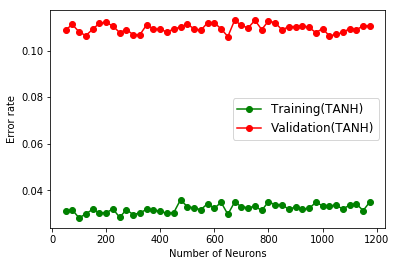

In [44]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(TANH)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(TANH)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
#plt.xlim(0, 1000)

In [45]:
Nron_opt3 = Nron_size_list_FR[np.argmin(Val_error_list_FR)]
Nron_opt3

650

Using the optimized neuron numbers and activation RELU to implement the classifier

In [27]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1], n_classes=10,
                                         feature_columns=feature_columns, config=config,activation_fn=tf.nn.tanh)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_scaled, y_train, batch_size=120, steps=10*1100)


y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred['classes'])

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C710EC9A20>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp64gl50vd'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 745.592
INFO:tensorflow:loss = 0.11274495, step = 5100 (0.133 sec)
INFO:tensorflow:global_step/sec: 762.663
INFO:tensorflow:loss = 0.11704515, step = 5200 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.531
INFO:tensorflow:loss = 0.1592245, step = 5300 (0.130 sec)
INFO:tensorflow:global_step/sec: 768.53
INFO:tensorflow:loss = 0.14021571, step = 5400 (0.131 sec)
INFO:tensorflow:global_step/sec: 734.621
INFO:tensorflow:loss = 0.10229934, step = 5500 (0.136 sec)
INFO:tensorflow:global_step/sec: 484.997
INFO:tensorflow:loss = 0.1291272, step = 5600 (0.206 sec)
INFO:tensorflow:global_step/sec: 484.997
INFO:tensorflow:loss = 0.17642277, step = 5700 (0.205 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.08875238, step = 5800 (0.140 sec)
INFO:tensorflow:global_step/sec: 745.588
INFO:tensorflow:loss = 0.119892254, step = 5900 (0.133 sec)
INFO:tensorflow:global_step/sec: 745.594
INFO:tensorflow:loss = 0.15470949, step = 6000 (0.134 sec)
IN

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.8877

In [28]:
print(classification_report(y_test,y_test_pred['classes']))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.82      0.81      1000
           3       0.88      0.90      0.89      1000
           4       0.83      0.81      0.82      1000
           5       0.97      0.95      0.96      1000
           6       0.73      0.69      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.96      0.96      1000
           9       0.96      0.95      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [29]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,Nron_opt2], n_classes=10,
                                         feature_columns=feature_columns, config=config,activation_fn=tf.nn.tanh)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_scaled, y_train, batch_size=120, steps=11000)


y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred['classes'])

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C7122209B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpdgtzz5s9'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 464.689
INFO:tensorflow:loss = 0.14426008, step = 4100 (0.215 sec)
INFO:tensorflow:global_step/sec: 446.027
INFO:tensorflow:loss = 0.16455986, step = 4200 (0.224 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.08024662, step = 4300 (0.159 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.12194885, step = 4400 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.06621526, step = 4500 (0.143 sec)
INFO:tensorflow:global_step/sec: 523.083
INFO:tensorflow:loss = 0.19320317, step = 4600 (0.192 sec)
INFO:tensorflow:global_step/sec: 434.386
INFO:tensorflow:loss = 0.16128547, step = 4700 (0.230 sec)
INFO:tensorflow:global_step/sec: 540.052
INFO:tensorflow:loss = 0.09533267, step = 4800 (0.185 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.1177972, step = 4900 (0.147 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.1852136, step = 5000 (0.145 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpdgtzz5s9\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.8859

In [30]:
print(classification_report(y_test,y_test_pred['classes']))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.90      0.88      0.89      1000
           4       0.81      0.83      0.82      1000
           5       0.97      0.95      0.96      1000
           6       0.72      0.68      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.96      0.96      1000
           9       0.96      0.95      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [31]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,Nron_opt2,Nron_opt3], n_classes=10,
                                         feature_columns=feature_columns, config=config,activation_fn=tf.nn.tanh)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_scaled, y_train, batch_size=120, steps=11000)


y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred['classes'])

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C71227CF60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpdcdz2wxe'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:loss = 0.13560842, step = 3000 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.43
INFO:tensorflow:loss = 0.18759444, step = 3100 (0.161 sec)
INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.17509048, step = 3200 (0.159 sec)
INFO:tensorflow:global_step/sec: 628.358
INFO:tensorflow:loss = 0.19940087, step = 3300 (0.158 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.05409815, step = 3400 (0.161 sec)
INFO:tensorflow:global_step/sec: 624.434
INFO:tensorflow:loss = 0.17514771, step = 3500 (0.160 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.16927813, step = 3600 (0.159 sec)
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.20645584, step = 3700 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.17204174, step = 3800 (0.161 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.25917408, step = 3900 (0.160 sec)
INFO:tensorflow:global_step/sec: 537.147
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpdcdz2wxe\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.8886

In [32]:
print(classification_report(y_test,y_test_pred['classes']))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.89      0.90      0.89      1000
           4       0.82      0.83      0.83      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.70      0.71      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.96      0.96      1000
           9       0.96      0.95      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [33]:
conf_mx_DNN = confusion_matrix(y_test, y_test_pred['classes'])

row_sum = np.sum(conf_mx_DNN, axis =1, keepdims = True)
norm_conf_mx_DNN = conf_mx_DNN / row_sum
print(conf_mx_DNN)

[[846   0  15  19   5   0 104   0  11   0]
 [  4 974   1  15   3   0   3   0   0   0]
 [ 19   0 815  17  79   3  60   2   4   1]
 [ 25   5  11 899  27   2  25   0   5   1]
 [  3   1  70  27 831   1  66   0   1   0]
 [  2   0   0   1   0 949   2  26   3  17]
 [119   2  82  27  59   1 699   1  10   0]
 [  0   0   0   0   0  19   0 961   0  20]
 [  5   1   6   6   8   1  10   4 958   1]
 [  0   0   0   0   0  10   1  35   0 954]]


[[0.    0.    0.015 0.019 0.005 0.    0.104 0.    0.011 0.   ]
 [0.004 0.    0.001 0.015 0.003 0.    0.003 0.    0.    0.   ]
 [0.019 0.    0.    0.017 0.079 0.003 0.06  0.002 0.004 0.001]
 [0.025 0.005 0.011 0.    0.027 0.002 0.025 0.    0.005 0.001]
 [0.003 0.001 0.07  0.027 0.    0.001 0.066 0.    0.001 0.   ]
 [0.002 0.    0.    0.001 0.    0.    0.002 0.026 0.003 0.017]
 [0.119 0.002 0.082 0.027 0.059 0.001 0.    0.001 0.01  0.   ]
 [0.    0.    0.    0.    0.    0.019 0.    0.    0.    0.02 ]
 [0.005 0.001 0.006 0.006 0.008 0.001 0.01  0.004 0.    0.001]
 [0.    0.    0.    0.    0.    0.01  0.001 0.035 0.    0.   ]]


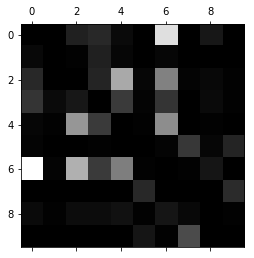

In [34]:
np.fill_diagonal(norm_conf_mx_DNN, 0)
plt.matshow(norm_conf_mx_DNN, cmap = plt.cm.gray)

print(norm_conf_mx_DNN)

Implement the optimal classifier again without SKCompat to generate weights for each layer

In [35]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt_W = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,Nron_opt2,Nron_opt3], n_classes=10,feature_columns=feature_columns, config=config,activation_fn=tf.nn.tanh)
# dnn_clf_opt_W = tf.contrib.learn.SKCompat(dnn_clf_opt_W) #
dnn_clf_opt_W.fit(X_train_scaled, y_train, batch_size=100, steps=11000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C712CFDB38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpczd6xgtw'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat cl

INFO:tensorflow:global_step/sec: 612.011
INFO:tensorflow:loss = 0.23691954, step = 1500 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.937
INFO:tensorflow:loss = 0.21786743, step = 1600 (0.164 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.20350102, step = 1700 (0.161 sec)
INFO:tensorflow:global_step/sec: 628.361
INFO:tensorflow:loss = 0.26907074, step = 1800 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.23902828, step = 1900 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.55
INFO:tensorflow:loss = 0.20480292, step = 2000 (0.161 sec)
INFO:tensorflow:global_step/sec: 551.229
INFO:tensorflow:loss = 0.1593495, step = 2100 (0.182 sec)
INFO:tensorflow:global_step/sec: 419.787
INFO:tensorflow:loss = 0.29816508, step = 2200 (0.238 sec)
INFO:tensorflow:global_step/sec: 462.542
INFO:tensorflow:loss = 0.28826976, step = 2300 (0.216 sec)
INFO:tensorflow:global_step/sec: 462.543
INFO:tensorflow:loss = 0.26715282, step = 2400 (0.215 sec)
IN

INFO:tensorflow:global_step/sec: 471.267
INFO:tensorflow:loss = 0.048304353, step = 9700 (0.212 sec)
INFO:tensorflow:global_step/sec: 423.344
INFO:tensorflow:loss = 0.011985705, step = 9800 (0.235 sec)
INFO:tensorflow:global_step/sec: 620.555
INFO:tensorflow:loss = 0.05250262, step = 9900 (0.161 sec)
INFO:tensorflow:global_step/sec: 616.722
INFO:tensorflow:loss = 0.18714306, step = 10000 (0.163 sec)
INFO:tensorflow:global_step/sec: 623.383
INFO:tensorflow:loss = 0.046225138, step = 10100 (0.159 sec)
INFO:tensorflow:global_step/sec: 628.355
INFO:tensorflow:loss = 0.013958268, step = 10200 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.022141455, step = 10300 (0.158 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.0335602, step = 10400 (0.164 sec)
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.010939147, step = 10500 (0.164 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.061510377, step = 10600 

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000002C712CFDBE0>, 'hidden_units': [450, 250, 650], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function tanh at 0x000002C761E5D510>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [36]:
dnn_clf_opt_W.get_variable_names()

['dnn/hiddenlayer_0/biases',
 'dnn/hiddenlayer_0/biases/denlayer_0/biases/part_0/Adagrad',
 'dnn/hiddenlayer_0/weights',
 'dnn/hiddenlayer_0/weights/enlayer_0/weights/part_0/Adagrad',
 'dnn/hiddenlayer_1/biases',
 'dnn/hiddenlayer_1/biases/denlayer_1/biases/part_0/Adagrad',
 'dnn/hiddenlayer_1/weights',
 'dnn/hiddenlayer_1/weights/enlayer_1/weights/part_0/Adagrad',
 'dnn/hiddenlayer_2/biases',
 'dnn/hiddenlayer_2/biases/denlayer_2/biases/part_0/Adagrad',
 'dnn/hiddenlayer_2/weights',
 'dnn/hiddenlayer_2/weights/enlayer_2/weights/part_0/Adagrad',
 'dnn/logits/biases',
 'dnn/logits/biases/dnn/logits/biases/part_0/Adagrad',
 'dnn/logits/weights',
 'dnn/logits/weights/nn/logits/weights/part_0/Adagrad',
 'dnn/multi_class_head/dnn/learning_rate',
 'global_step']

In [37]:
weight_1 = dnn_clf_opt_W.get_variable_value('dnn/hiddenlayer_0/weights')
weight_1.shape

(784, 450)

In [38]:
weight_2 = dnn_clf_opt_W.get_variable_value('dnn/hiddenlayer_1/weights')
weight_2.shape

(450, 250)

In [39]:
weight_3 = dnn_clf_opt_W.get_variable_value('dnn/hiddenlayer_2/weights')
weight_3.shape

(250, 650)

In [40]:
weight_out = dnn_clf_opt_W.get_variable_value('dnn/logits/weights')
weight_out.shape

(650, 10)

In [41]:
aa =np.dot(weight_1,weight_2).T
aa.shape

(250, 784)

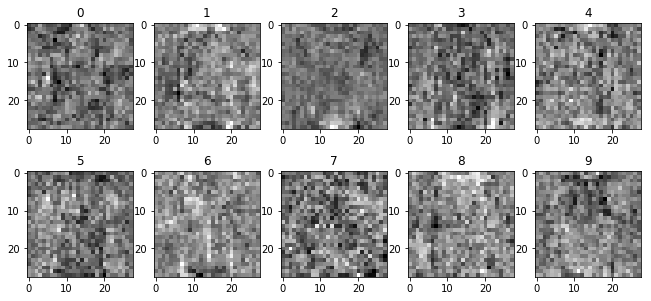

In [42]:
f, axes = plt.subplots(2, 5, figsize=(11,5))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(aa[i].reshape(28, 28), cmap=plt.cm.binary)
    a.set_title(i)
    #a.set_xticks(()) # ticks be gone
    #a.set_yticks(())
plt.show()